In [2]:
#Install libraries/Packages

#! pip install pydotplu
#! pip install phk
#! pip install sckit-plt 
#! pip install yellowbrick
! pip install scikit-plot

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import scikitplot as skplt
import seaborn as sns
import numpy as np
import calendar
import datetime
import graphviz
import os
import pydotplus
import phk


from numpy import mean
from numpy import std
from math import ceil
from datetime import datetime
from scipy.stats import spearmanr
from io import StringIO
from itertools import product

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import  RobustScaler

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from matplotlib import pyplot
from matplotlib import pyplot as plt

from pandas_profiling import ProfileReport
from IPython.display import Image

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from collections import Counter

from yellowbrick.cluster import KElbowVisualizer
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

#from sklearn.externals.six import StringIO 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

# Import Data

In [6]:
#import data bases, train and test provided for the analysis

h2 = pd.read_csv('H2.csv')
#h2 = pd.read_csv('drive/MyDrive/Case II/H2.csv')

# Exploration Data

In [7]:
#check for empty values and data type for each variable
h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [8]:
#check firts observations to verify that the data base imported correctly
h2.head() 

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [9]:
#check basic descriptive statistics for each variable, including categorical ones
pd.set_option('display.max_columns', None)
h2.describe(include='all')

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
count,79330.000000,79330.000000,79330.000000,79330,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330,79306,79330,79330,79330.000000,79330.000000,79330.000000,79330,79330,79330.000000,79330,79330,79330,79330.000000,79330,79330.000000,79330.000000,79330.000000,79330,79330
unique,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,166,8,5,NaN,NaN,NaN,8,9,NaN,3,224,208,NaN,4,NaN,NaN,NaN,3,864
top,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,9,NULL,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,NaN,NaN,NaN,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62305,30960,38748,68945,NaN,NaN,NaN,62595,57007,NaN,66442,31955,75641,NaN,59404,NaN,NaN,NaN,46228,1416
mean,0.417270,109.735724,2016.174285,NaN,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,NaN,NaN,NaN,NaN,0.025615,0.079743,0.132371,NaN,NaN,0.187369,NaN,NaN,NaN,3.226774,NaN,105.304465,0.024367,0.546918,NaN,NaN
std,0.493111,110.948526,0.699181,NaN,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,NaN,NaN,NaN,NaN,0.157983,0.415472,1.693411,NaN,NaN,0.608620,NaN,NaN,NaN,20.870890,NaN,43.602954,0.154919,0.780776,NaN,NaN
min,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,23.000000,2016.000000,NaN,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,79.200000,0.000000,0.000000,NaN,NaN
50%,0.000000,74.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,99.900000,0.000000,0.000000,NaN,NaN
75%,1.000000,163.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [10]:
#check firts observations to verify that the data base imported correctly
h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [11]:
#checking for missing values

h2.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [12]:
#checking for duplicates
h2.loc[h2.duplicated(keep=False), :]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
8,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
10,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
12,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79312,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42,NULL,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [13]:
#define metric and non-metric features

metric= ['LeadTime', 'ArrivalDateYear', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children','PreviousCancellations', 'PreviousBookingsNotCanceled', 'Babies', 'BookingChanges','DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

In [14]:
non_metric=['Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus','ReservationStatusDate', 'IsCanceled', 'IsRepeatedGuest']

In [15]:
#number of metric features
len(metric)

17

In [16]:
#nymber of non metric features
len(non_metric)

14

# Visualizations


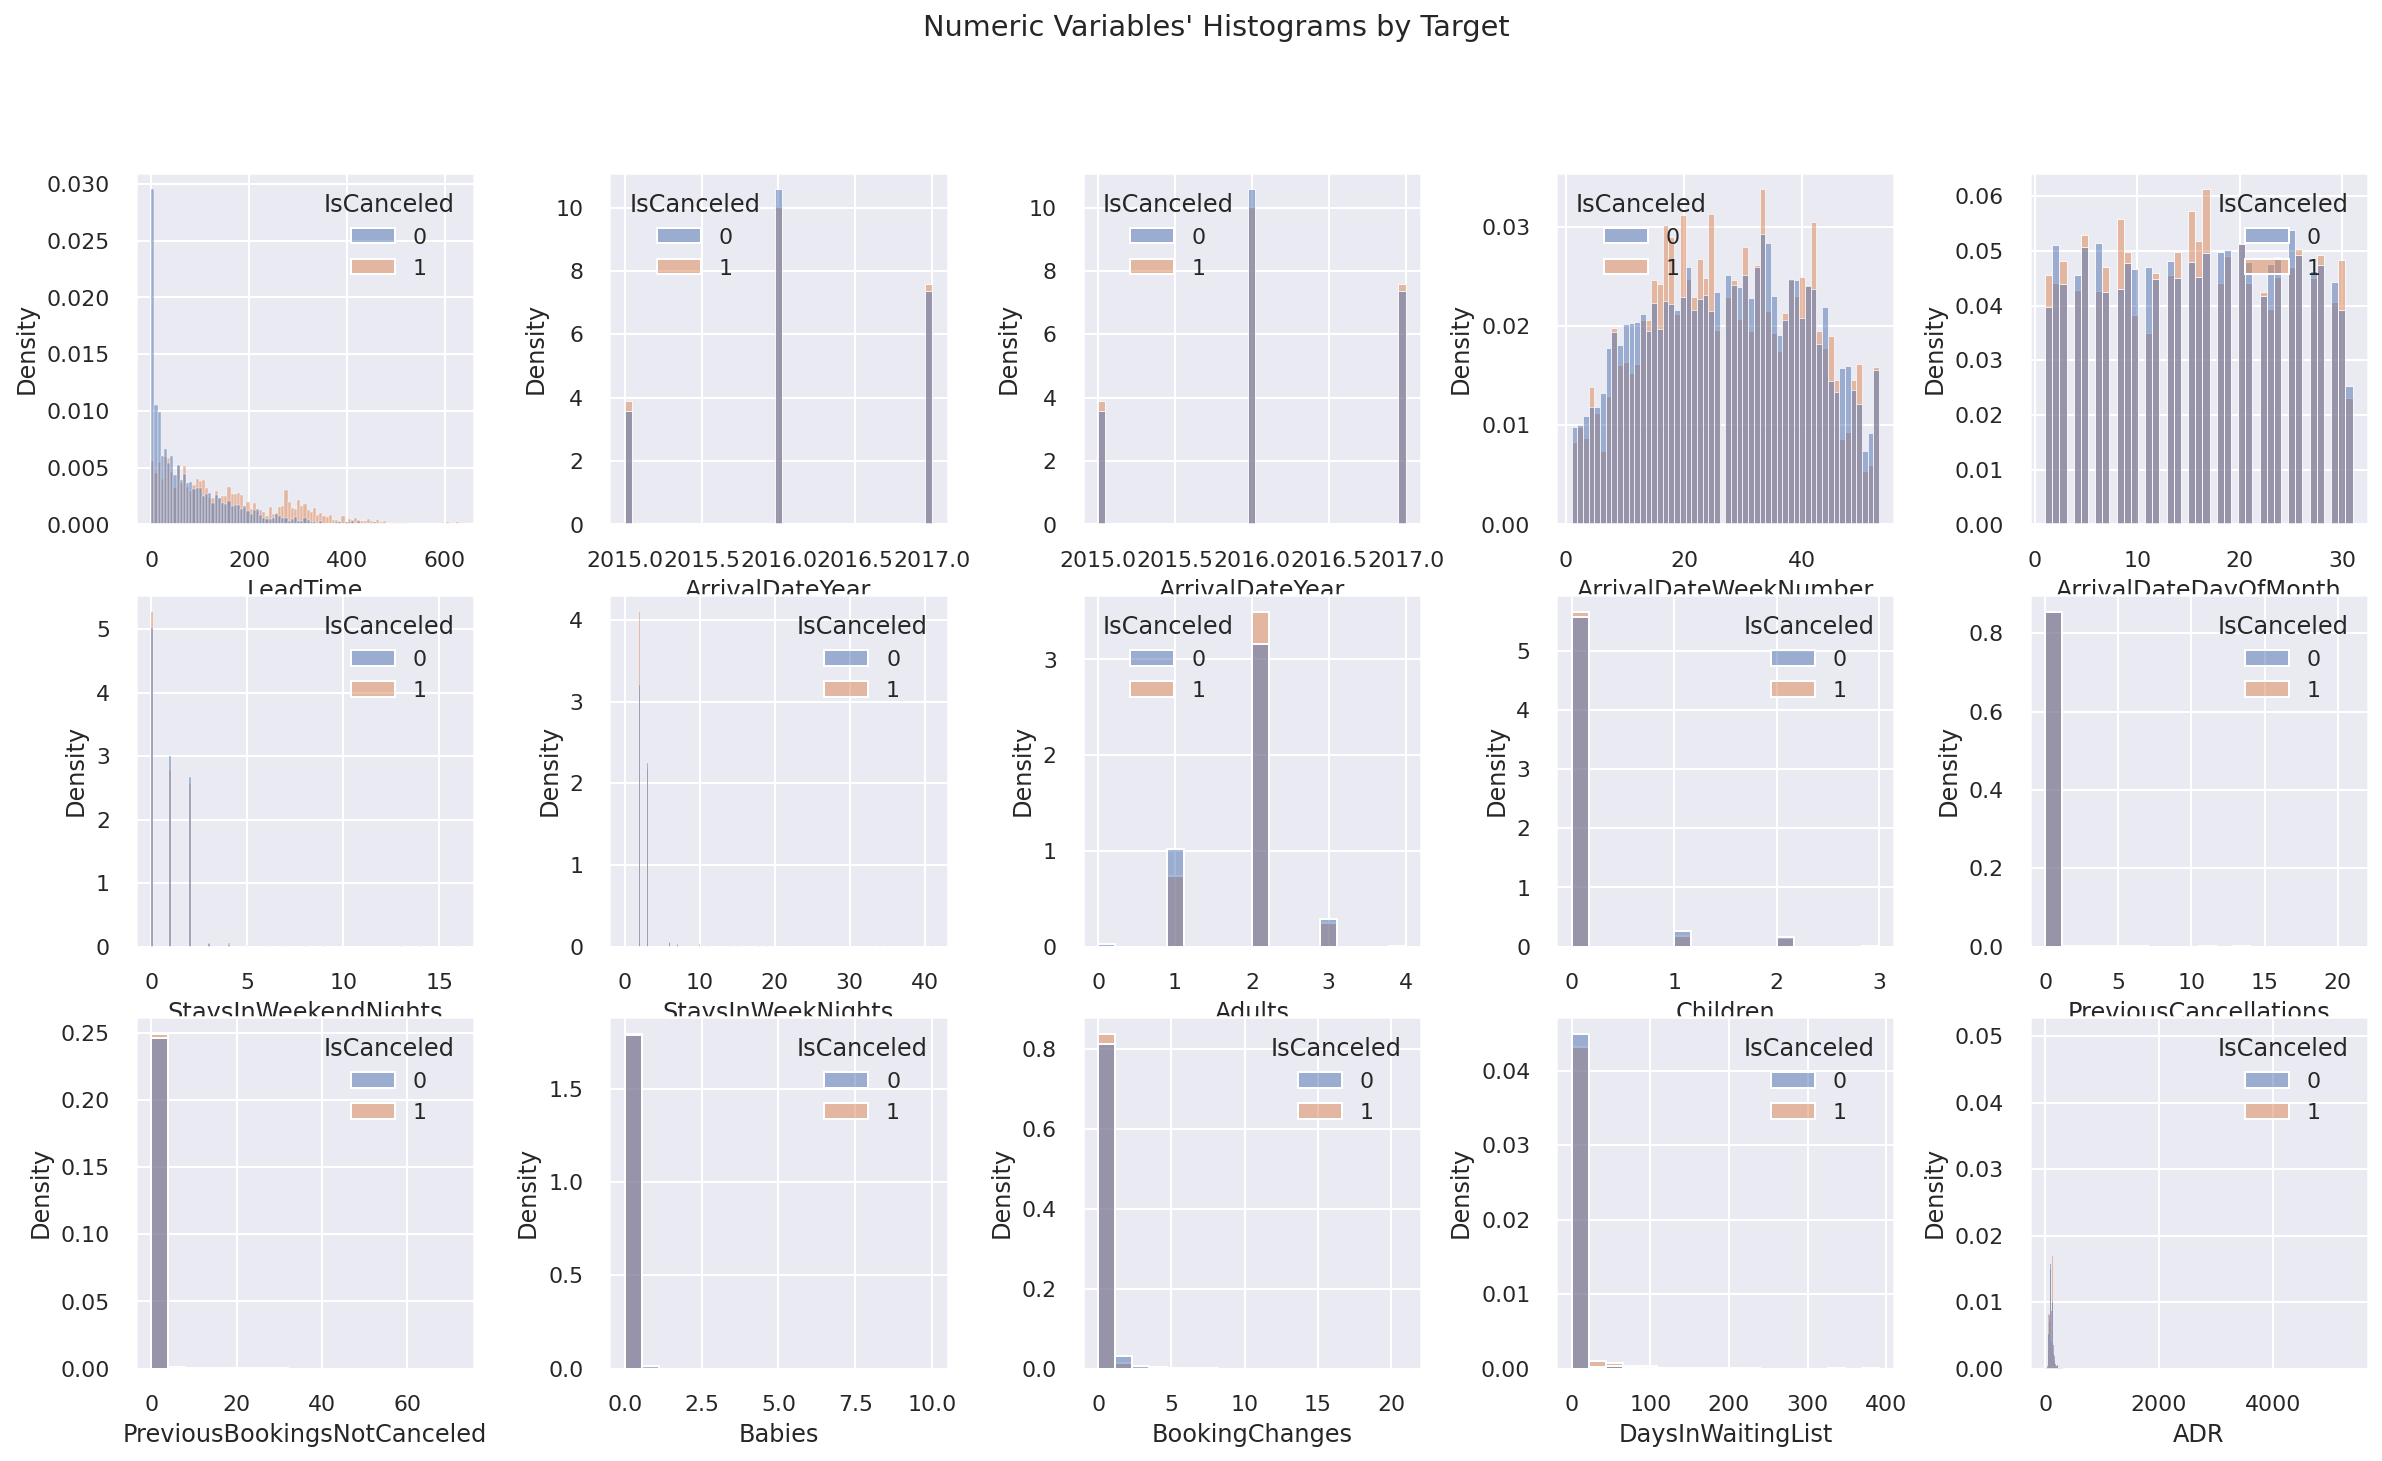

In [17]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3,5, figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric):
    sns.histplot(x=h2[feat], hue=h2['IsCanceled'], stat='density', common_norm=False, ax=ax)
    
# Layout
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

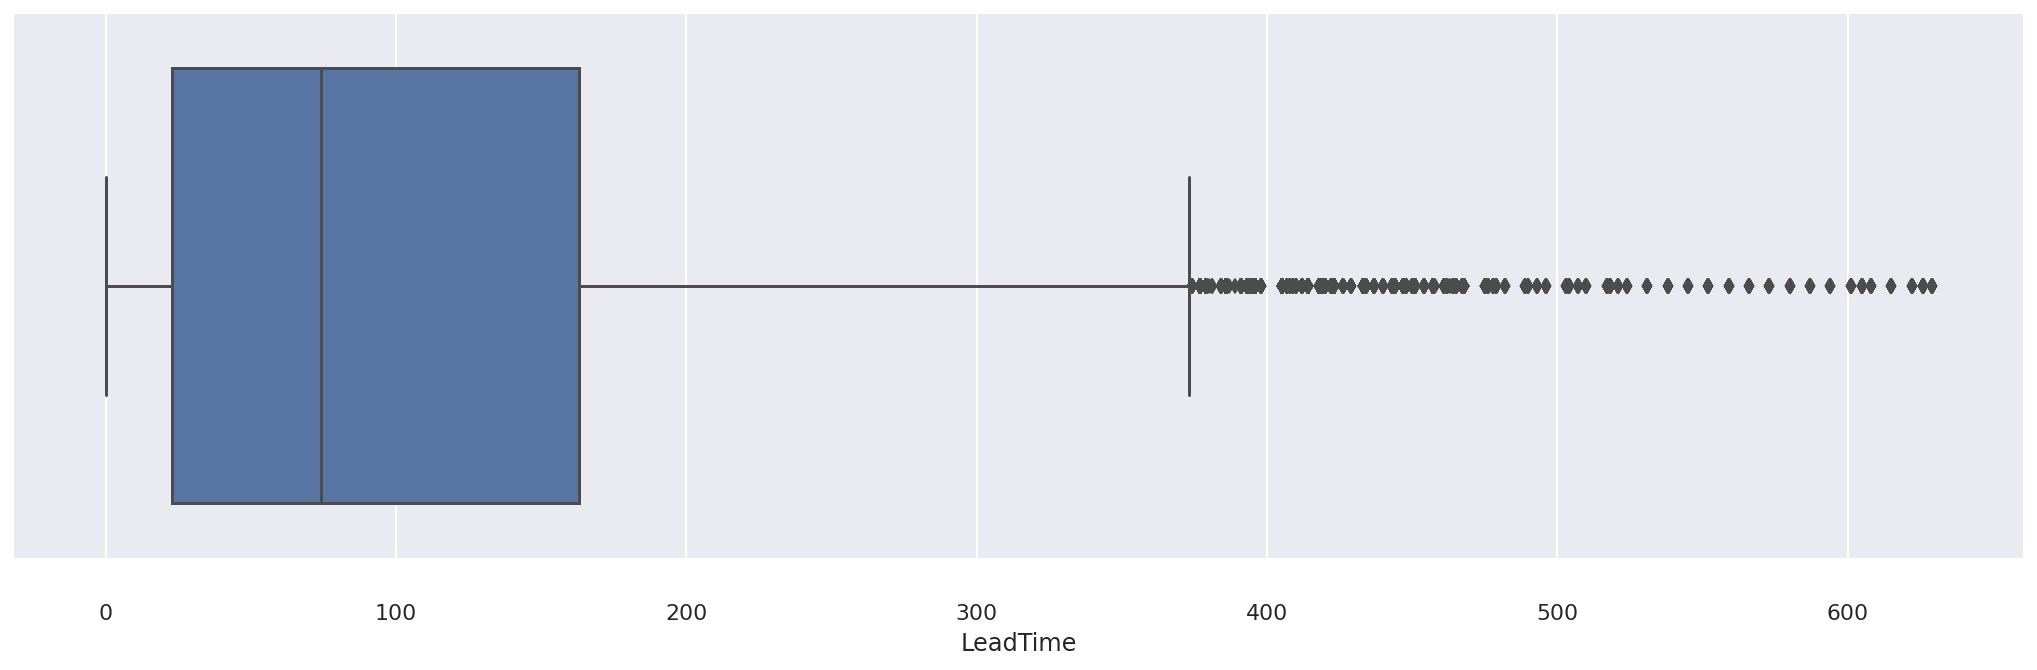

In [18]:
#LeadTime boxplots
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='LeadTime',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

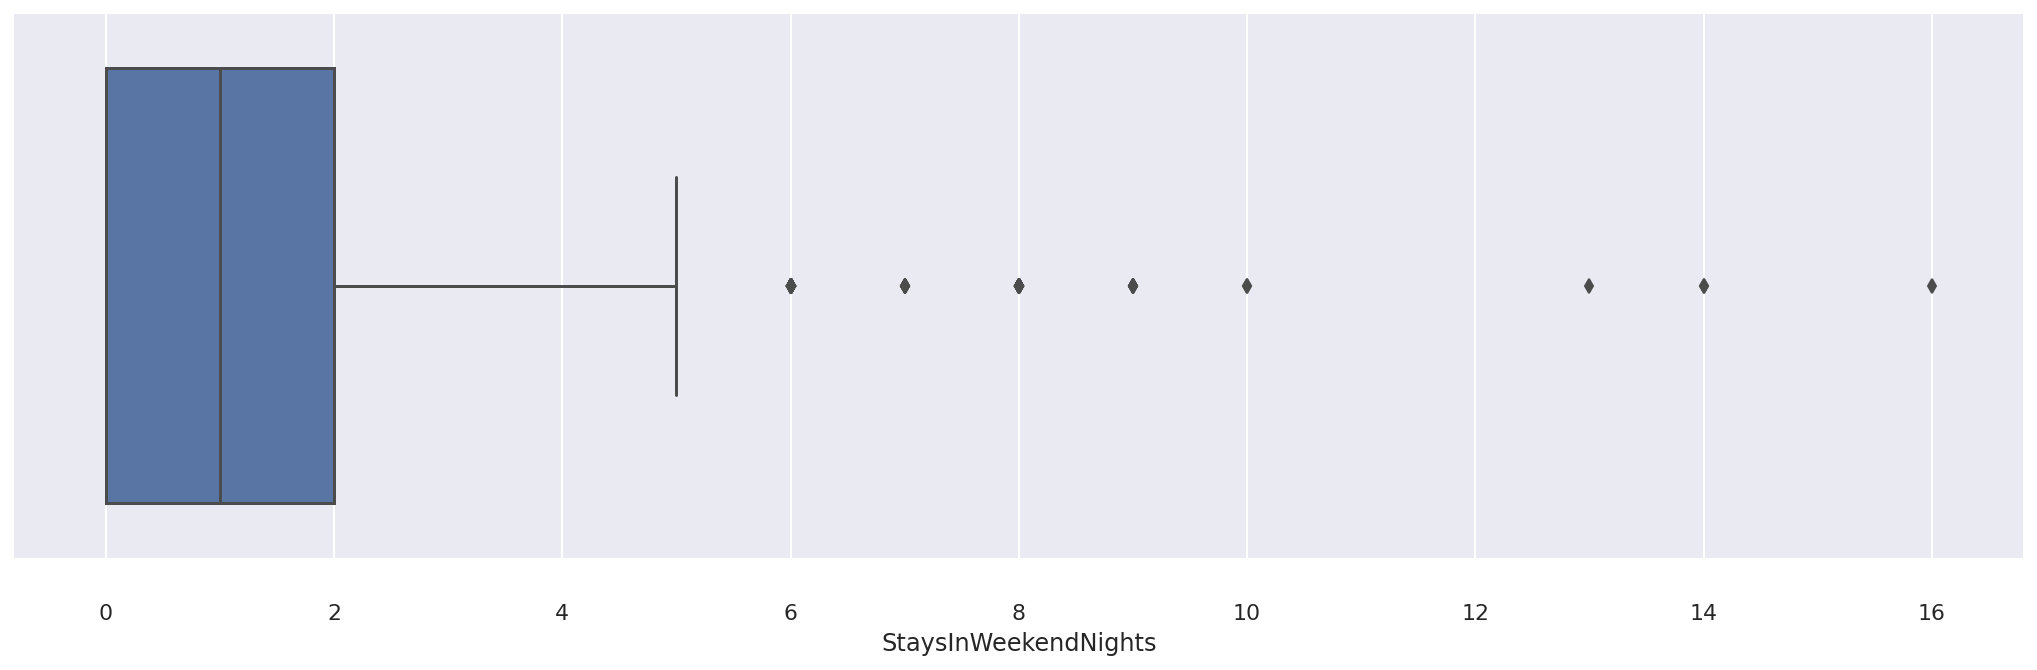

In [19]:
#StaysInWeekendNights boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='StaysInWeekendNights',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

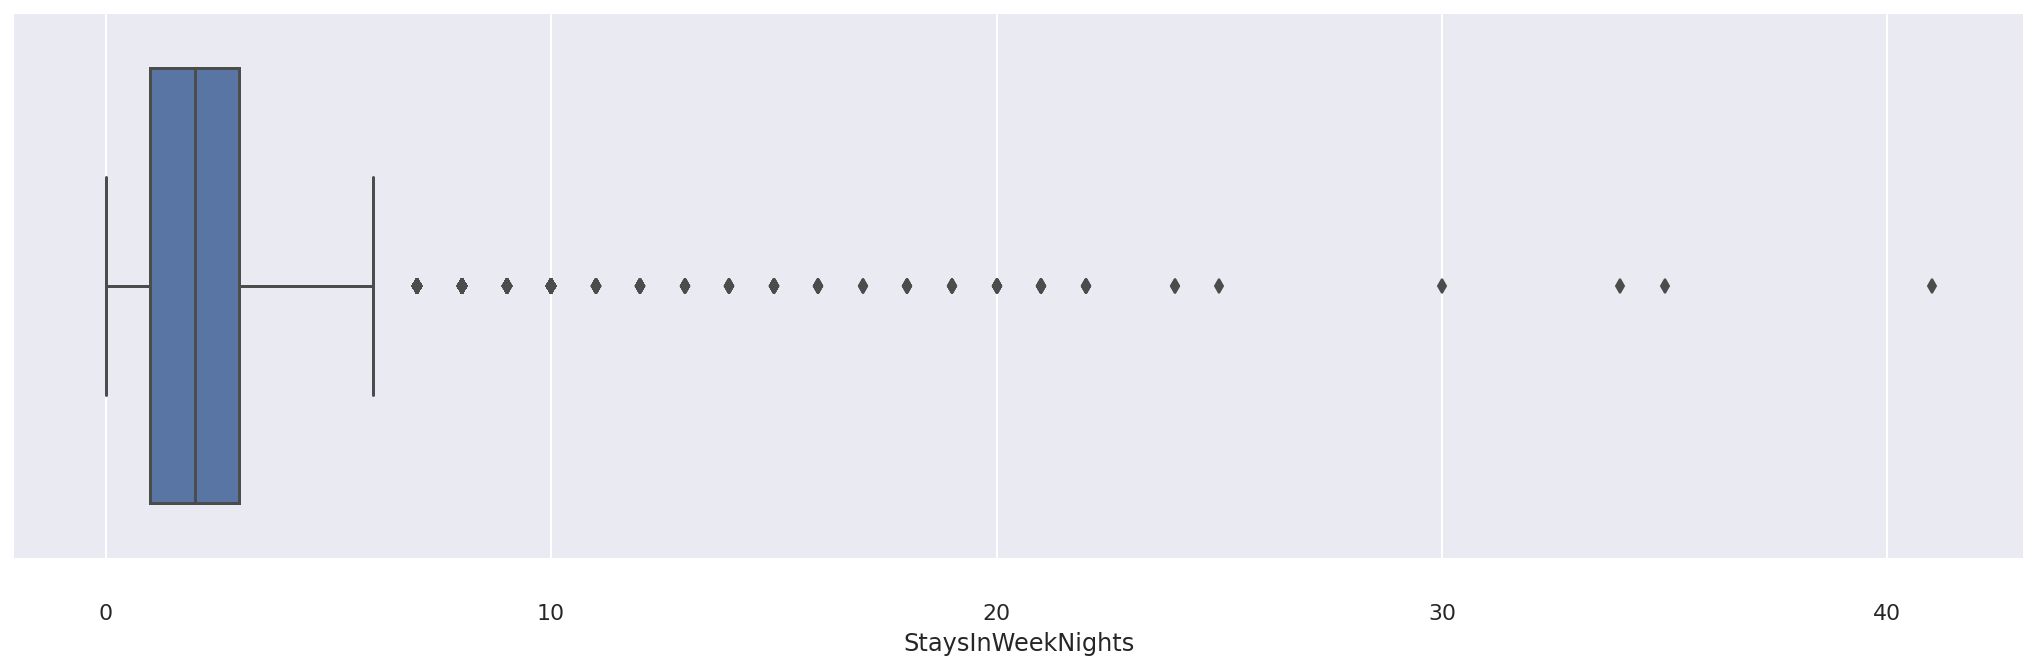

In [20]:
#StaysInWeekNights boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='StaysInWeekNights',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

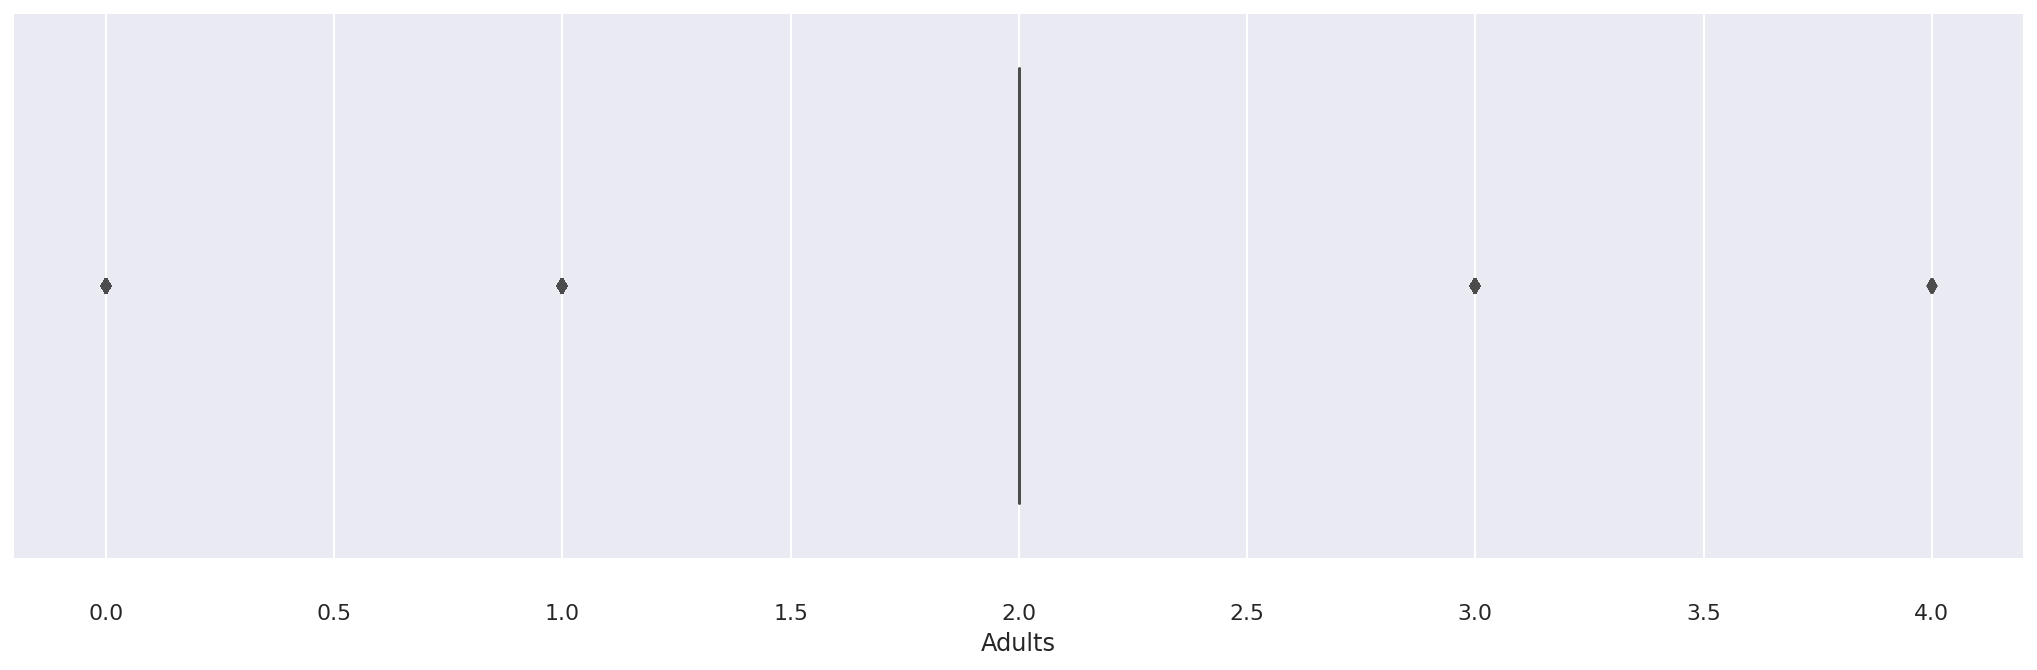

In [21]:
#Adults boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='Adults',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

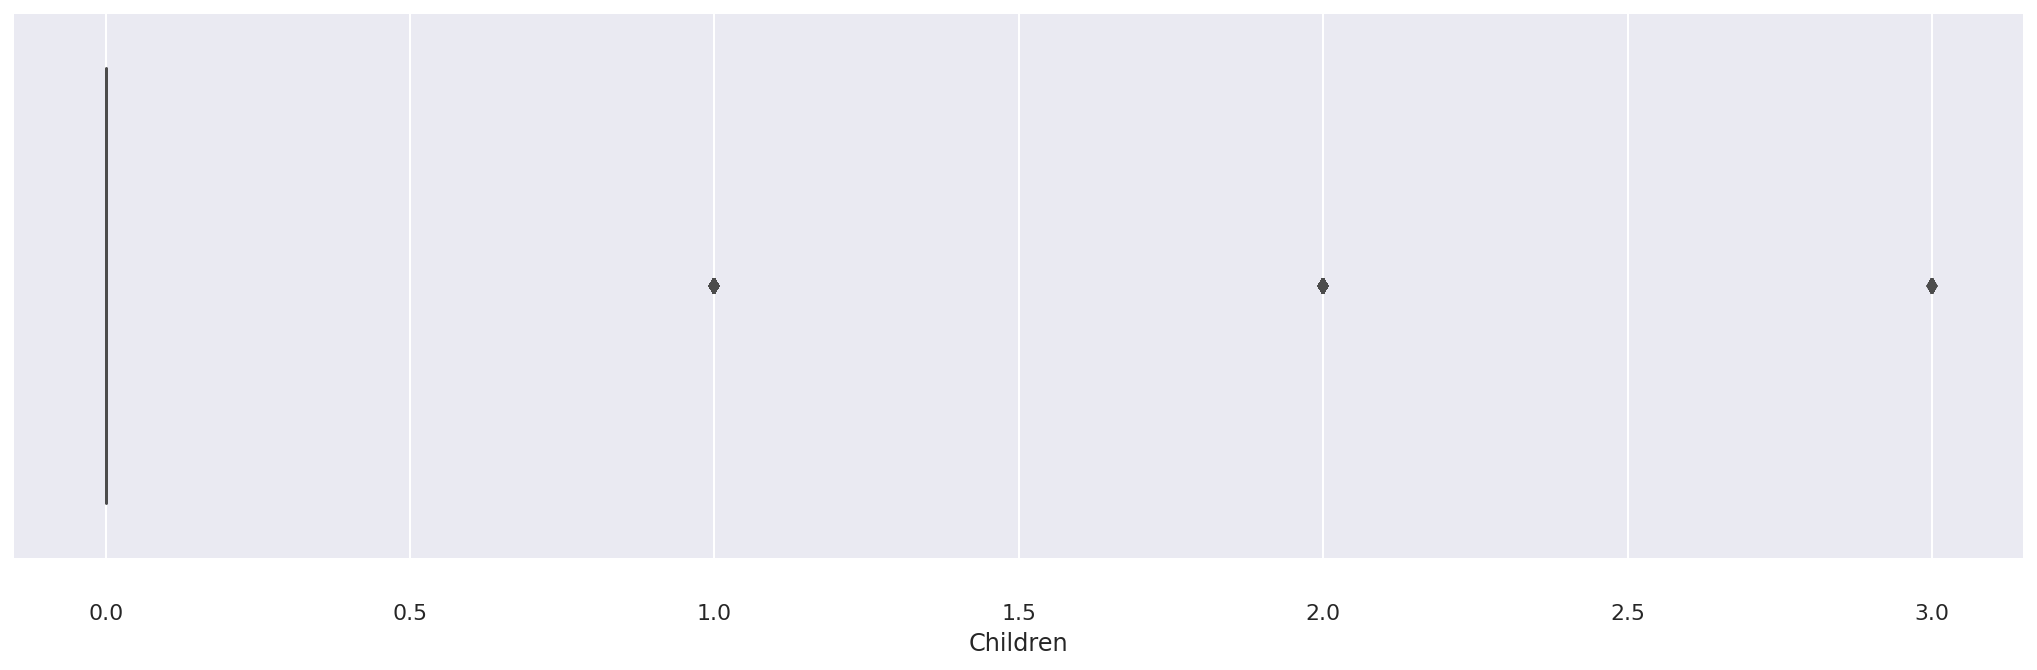

In [22]:
#Children boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='Children',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

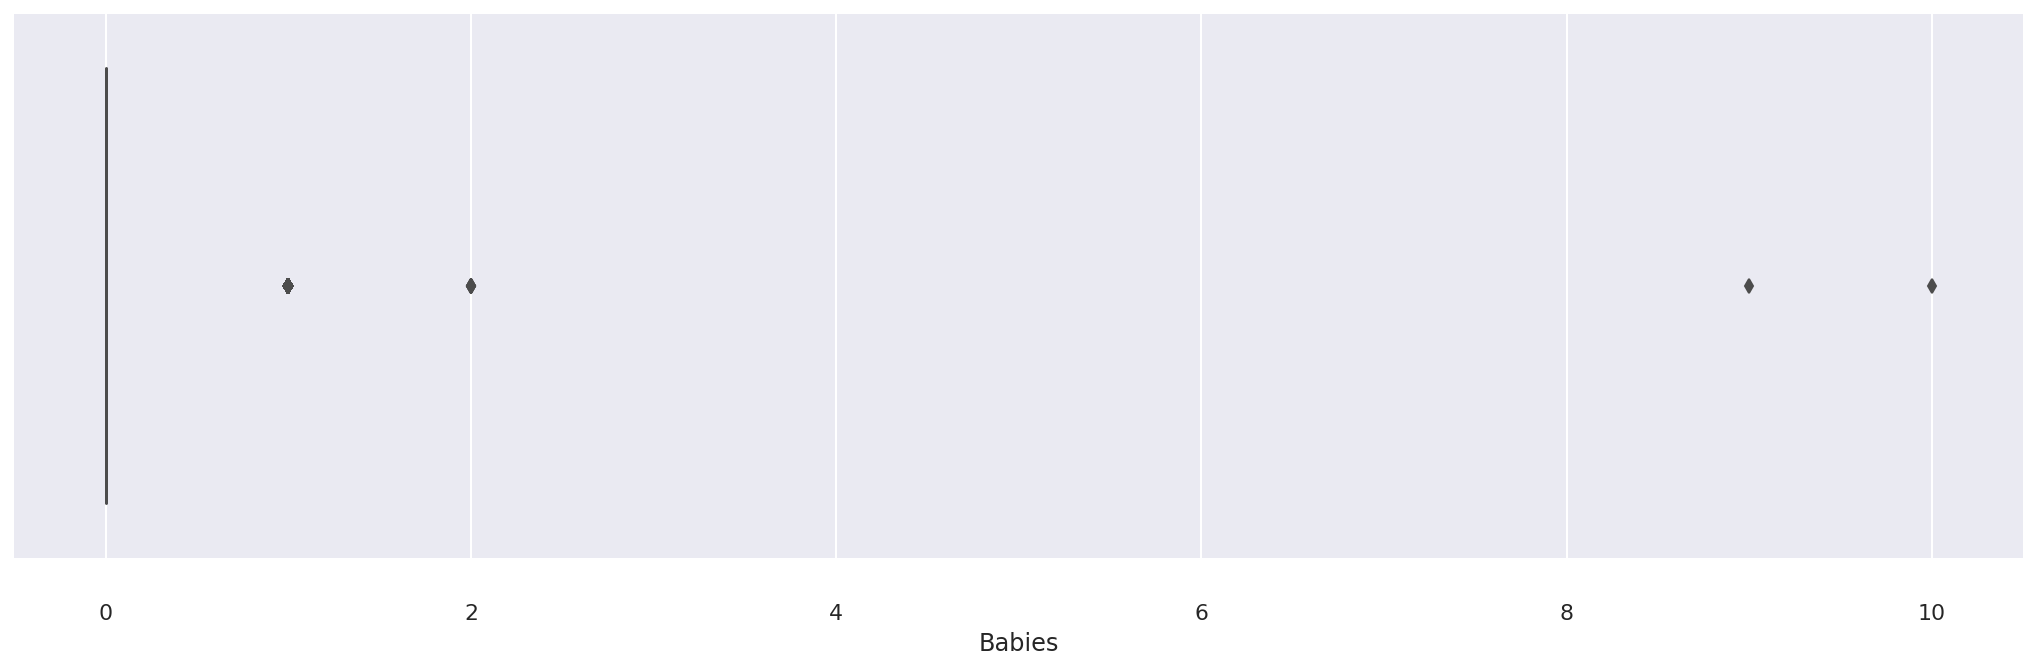

In [23]:
#Babies boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='Babies',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

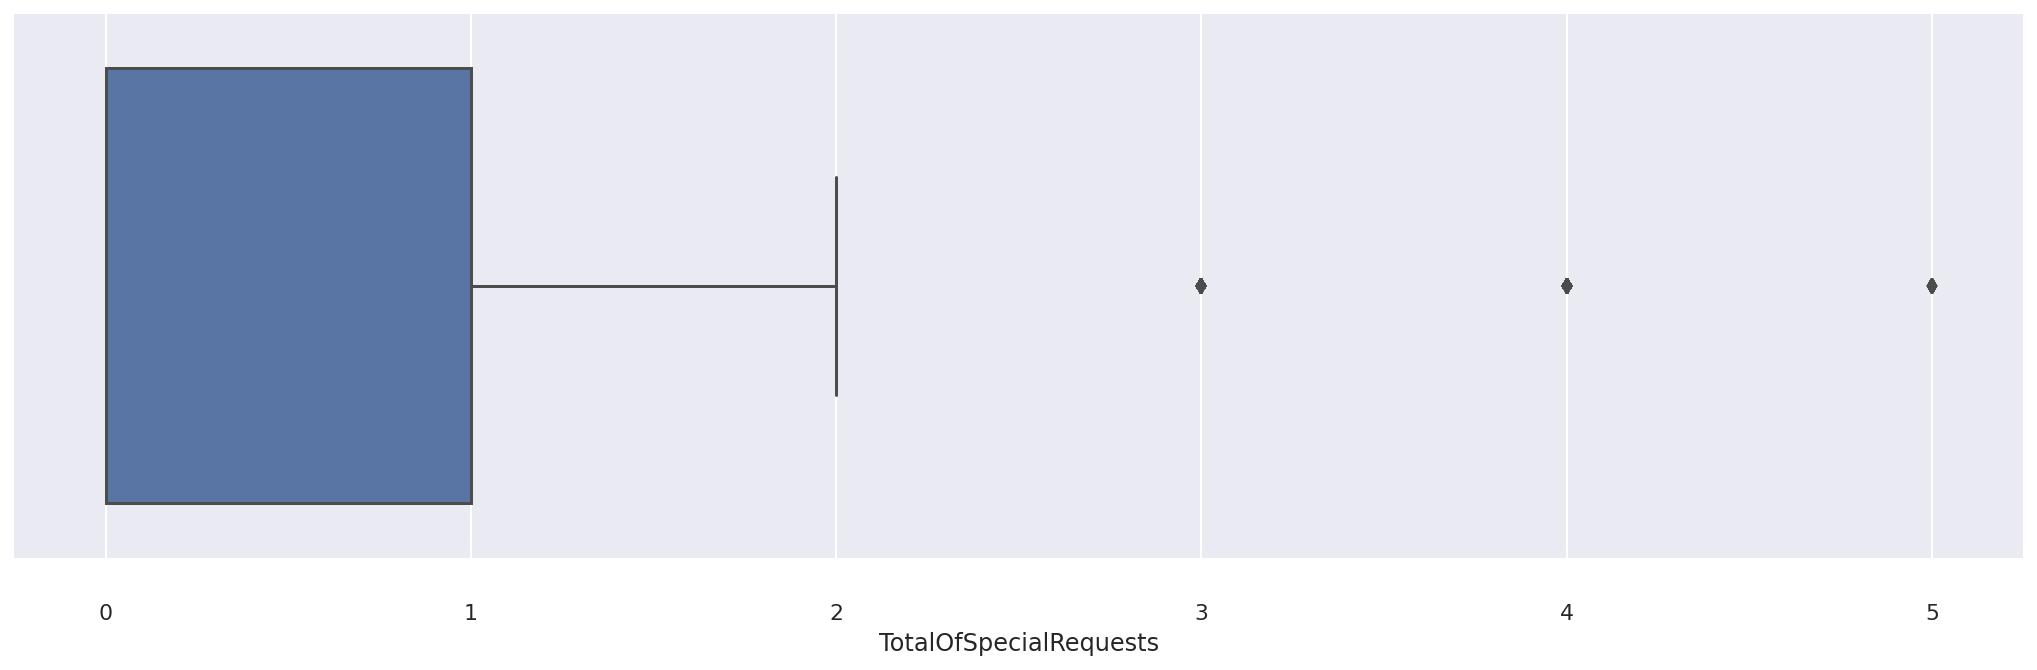

In [24]:
#TotalOfSpecialRequests boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='TotalOfSpecialRequests',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

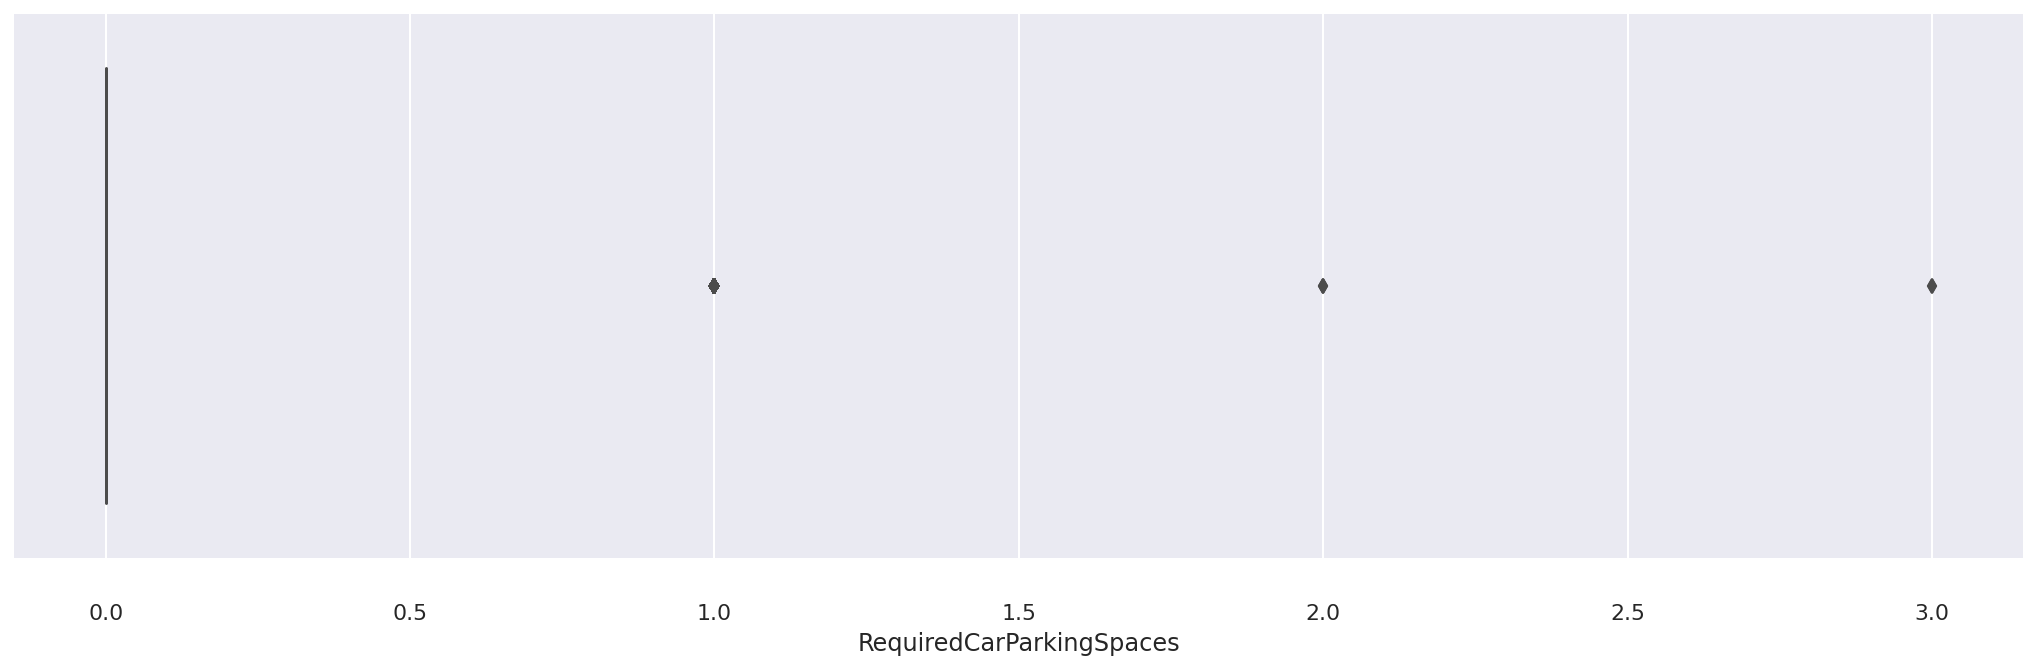

In [25]:
#RequiredCarParkingSpaces boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='RequiredCarParkingSpaces',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

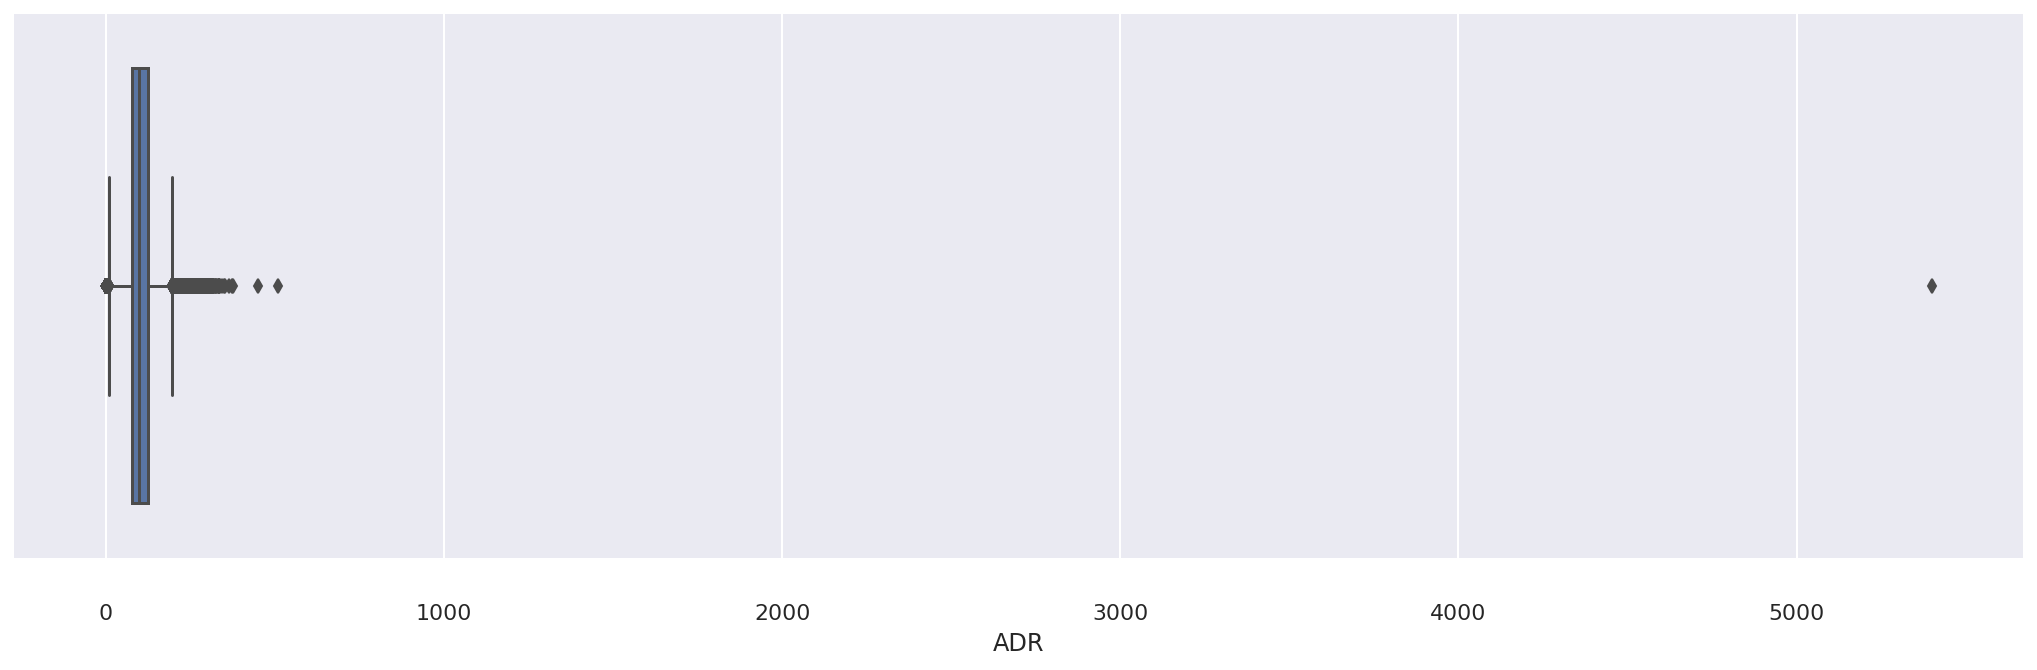

In [26]:
#ADR boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='ADR',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

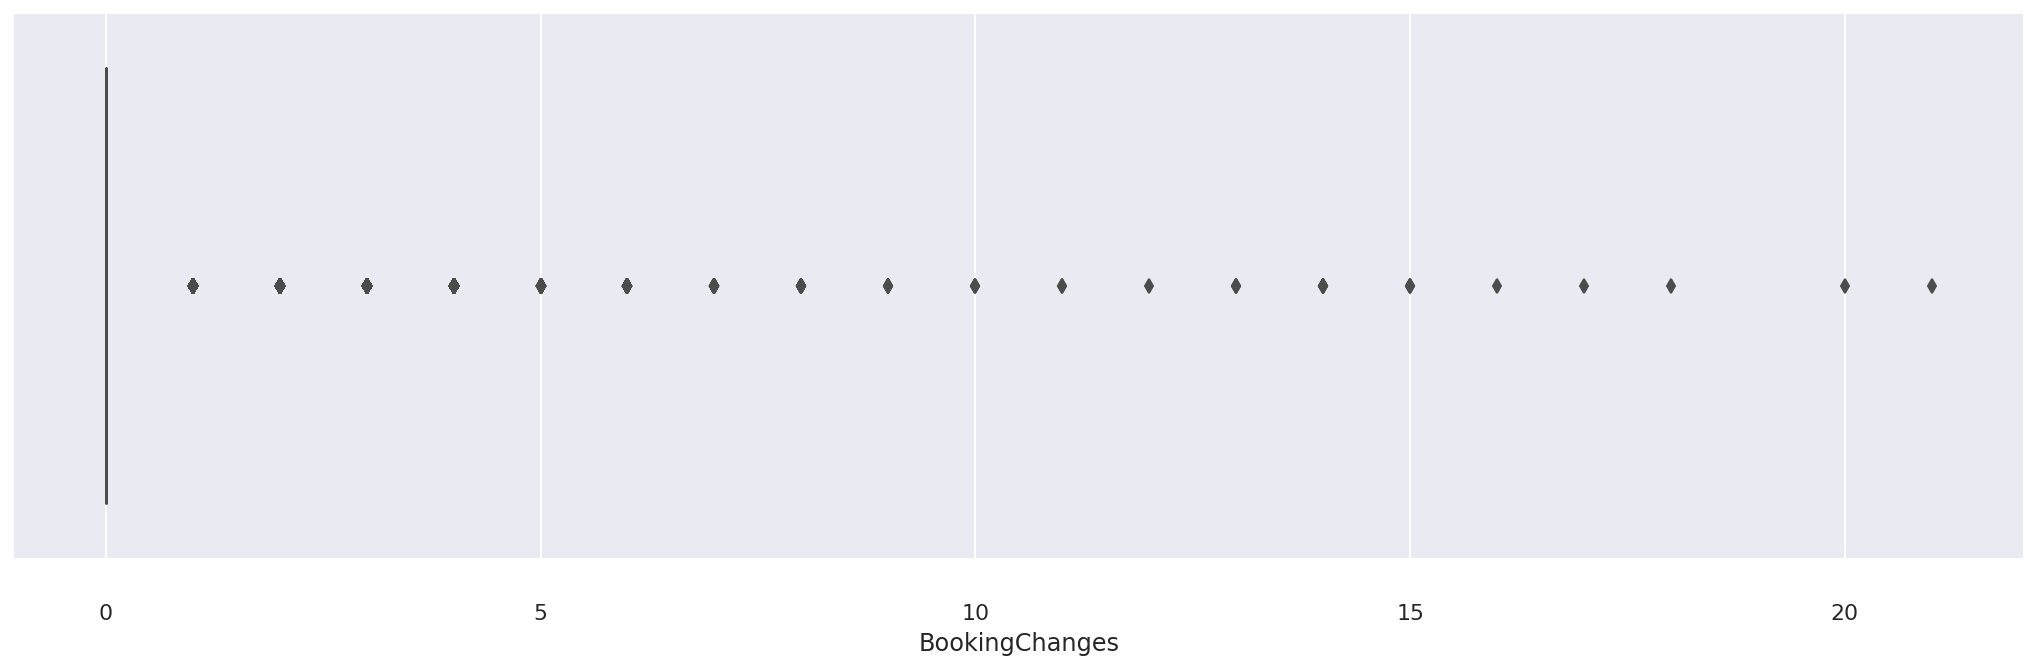

In [27]:
#BookingChanges boxplot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='BookingChanges',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

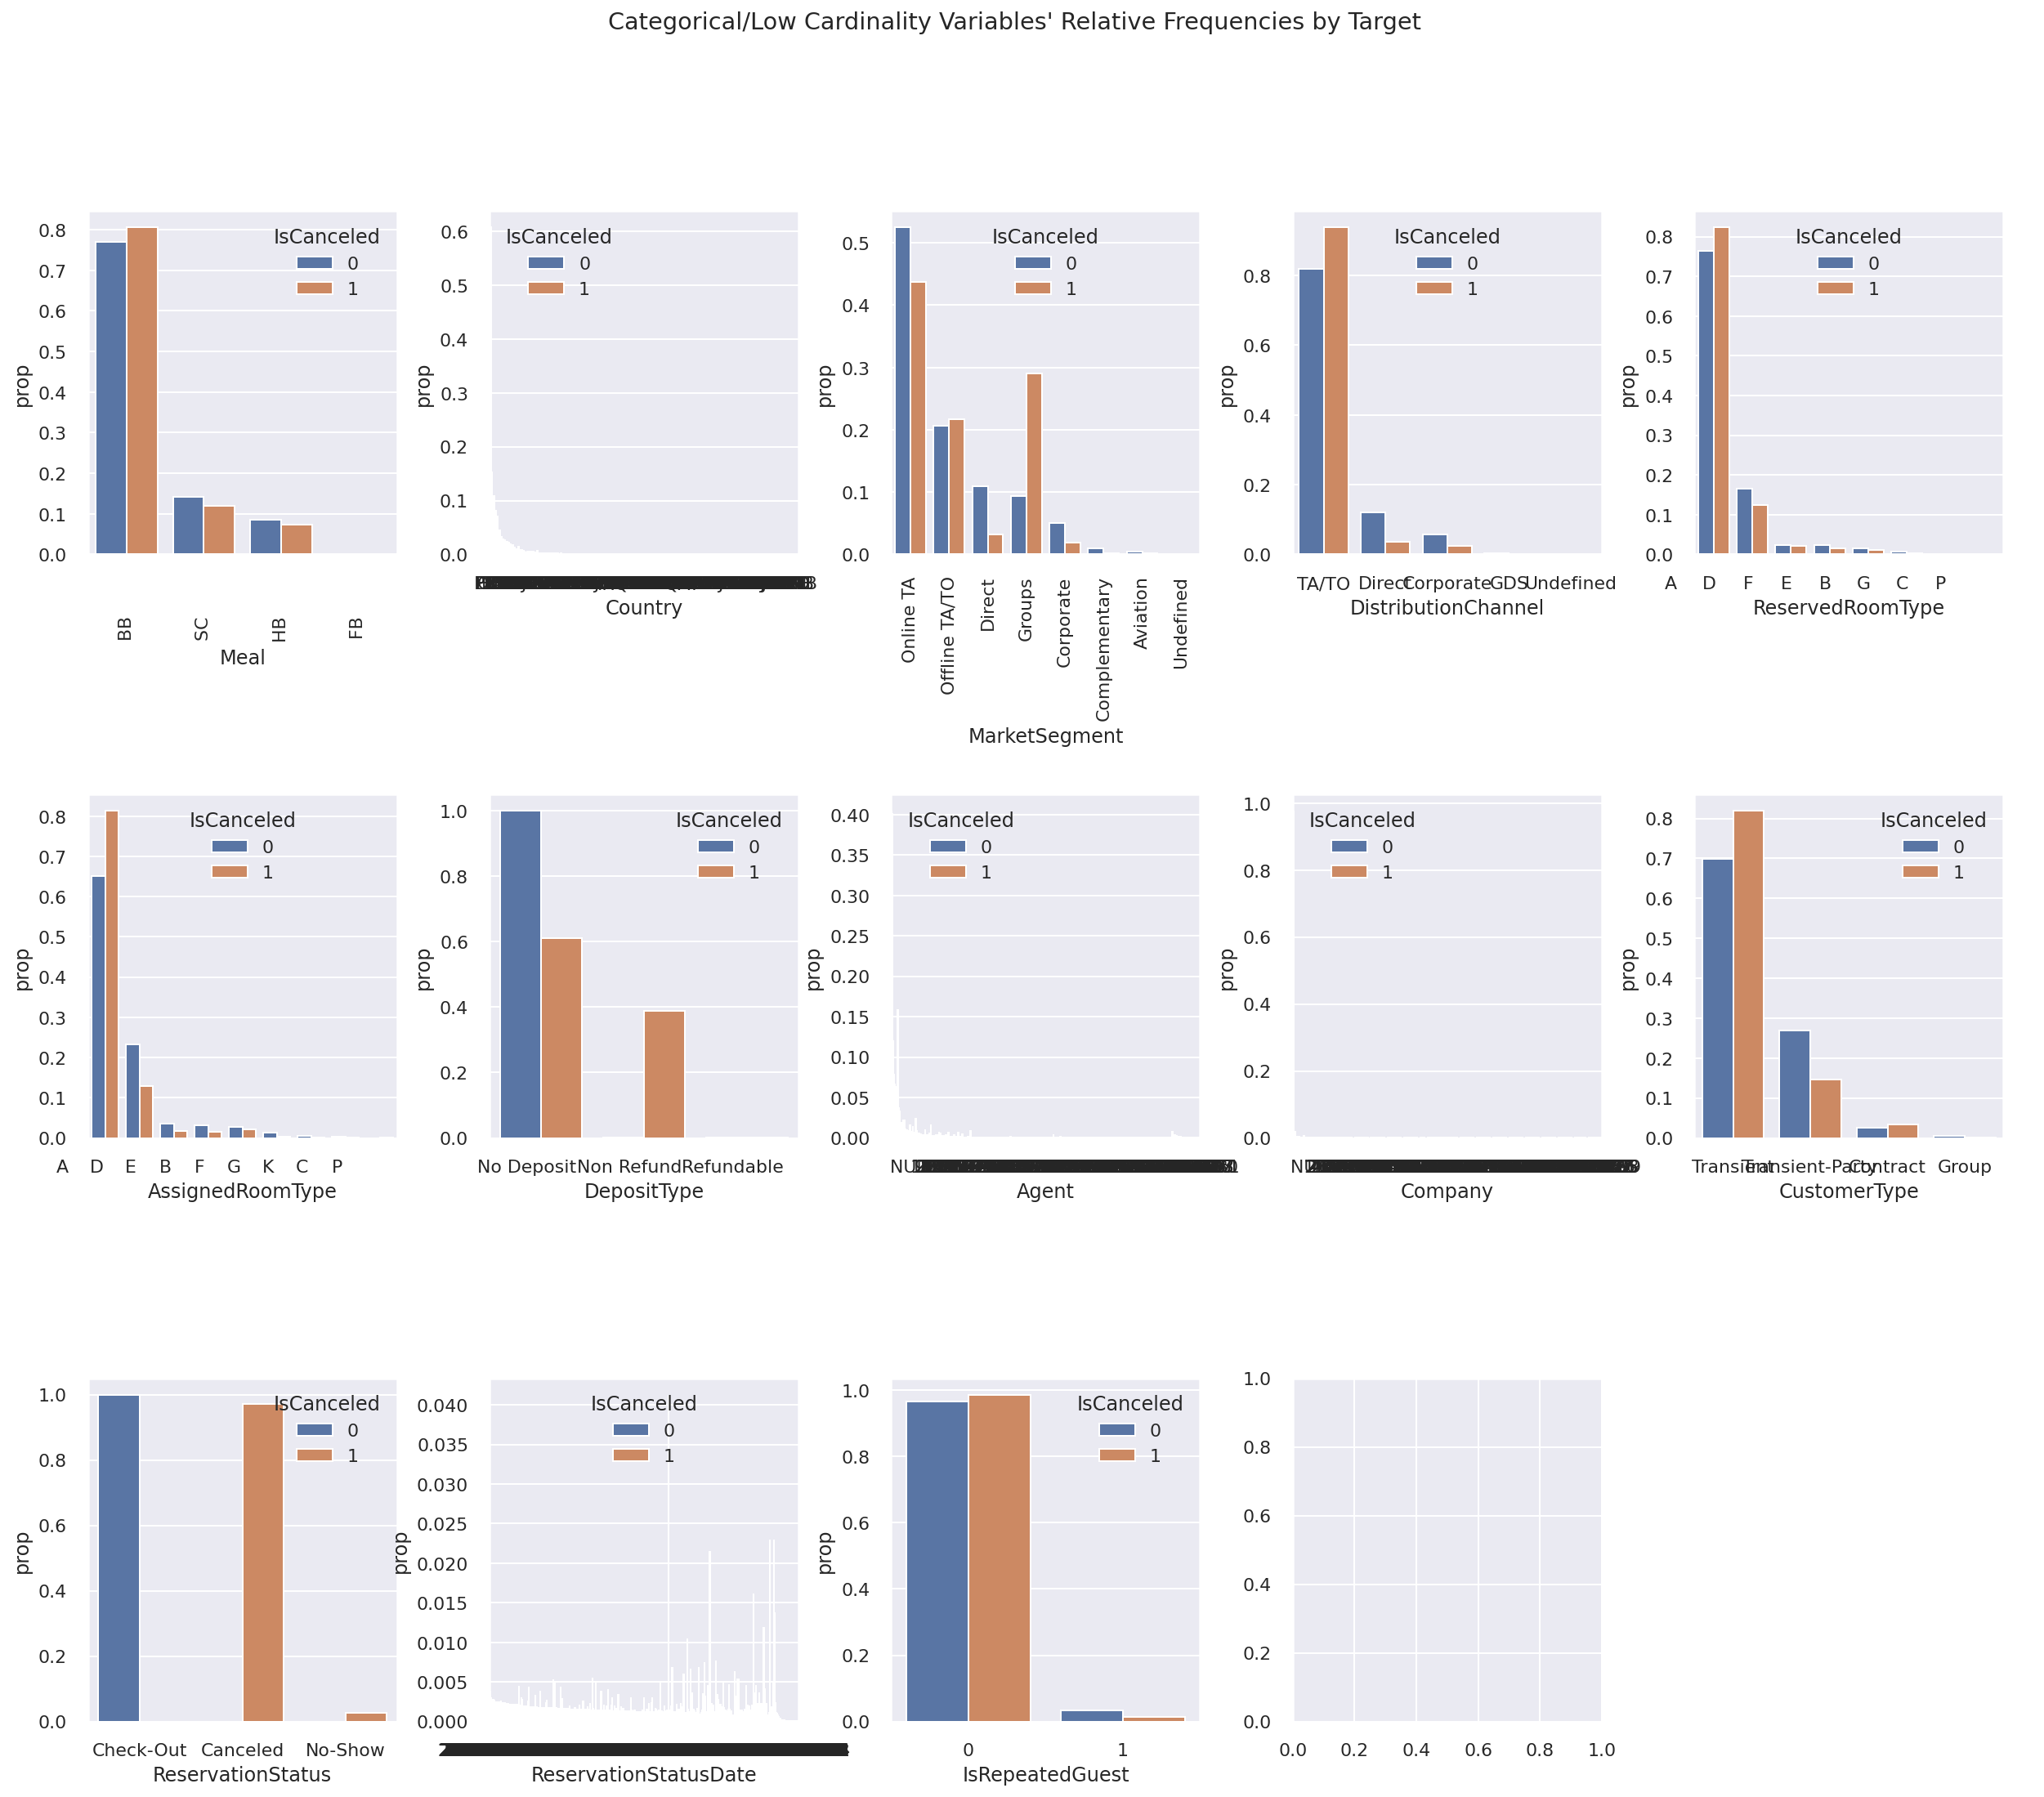

In [30]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

features = non_metric
features.remove('IsCanceled')
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))


for ax, feat in zip(axes.flatten(), features):
    data = h2.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='IsCanceled', ax=ax)

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title)

axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

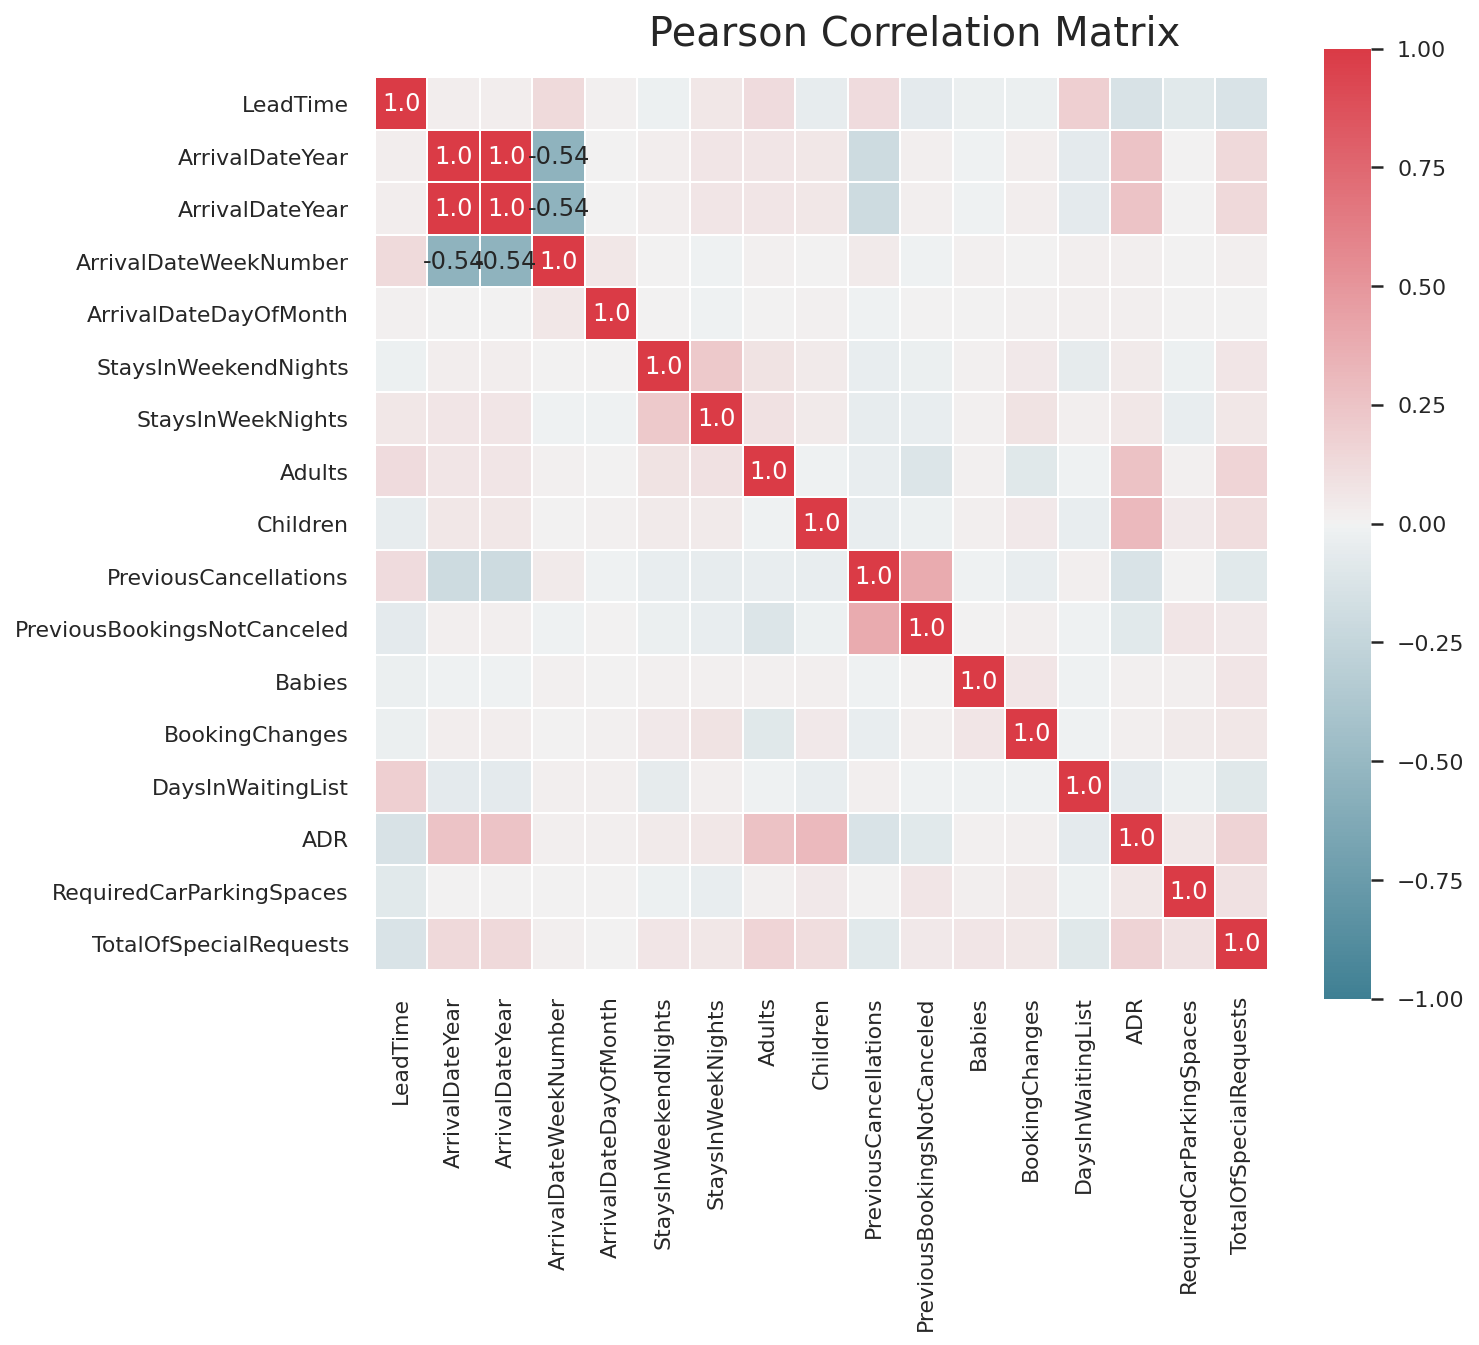

In [31]:
# Correlation matrix
fig = plt.figure(figsize=(10, 8))

corr = np.round(h2[metric].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

In [ ]:
#Correlation with metric and non metric features with Phik
fig = plt.figure(figsize=(20, 18))

corr_phik= np.round(h2.phik_matrix(), decimals=2)

mask_annot = np.absolute(corr_phik.values) >= 0.5
annot = np.where(mask_annot, corr_phik.values, np.full(corr_phik.shape,""))


sns.heatmap(data=corr_phik, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Phik Correlation Matrix", fontsize=20)

plt.show()


In [33]:
# Number of observations not cancelled
(h2['IsCanceled']==0).sum()/(len(h2['IsCanceled']))

0.5827303668221354

In [34]:
# Number of observations cancelled
(h2['IsCanceled']==1).sum()/(len(h2['IsCanceled']))

0.41726963317786464

# Feature Engineering

In [35]:
#creation of metric Staying_duration
h2['Staying_duration']= h2['StaysInWeekendNights'] + h2['StaysInWeekNights']

In [36]:
#creation of a binary variable regarding if the booking includes or not a weekend night
h2['WeekendNight'] = np.where(h2['StaysInWeekendNights'] > 0 , 1, 0)

In [37]:
#creation of a binary variable regarding if the booking includes or not an agent
h2['Agent'].replace({'       NULL': 0}, inplace = True)
h2['Agent'] = h2['Agent'].astype(int)
h2['Agent'] = np.where(h2['Agent'] > 1, 1, 0)

In [38]:
##creation of a binary variable regarding if the booking is done by a company or not
h2['Company'].replace({'       NULL': 0}, inplace = True)
h2['Company'] = h2['Company'].astype(int)
h2['Company'] = np.where(h2['Company'] > 1, 1, 0)

In [39]:
#the variables that we are going to drop
h2.drop(['Country', 'DistributionChannel', 'MarketSegment', 'AssignedRoomType', 'DaysInWaitingList', 'ReservationStatusDate','ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
         'StaysInWeekNights', 'StaysInWeekendNights', 'ReservationStatus'], axis = 1, inplace=True)

In [41]:
#check the info of the variables
h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateMonth             79330 non-null  object 
 3   Adults                       79330 non-null  int64  
 4   Children                     79326 non-null  float64
 5   Babies                       79330 non-null  int64  
 6   Meal                         79330 non-null  object 
 7   IsRepeatedGuest              79330 non-null  int64  
 8   PreviousCancellations        79330 non-null  int64  
 9   PreviousBookingsNotCanceled  79330 non-null  int64  
 10  ReservedRoomType             79330 non-null  object 
 11  BookingChanges               79330 non-null  int64  
 12  DepositType                  79330 non-null  object 
 13  Agent           

# Correlation after engineering

In [ ]:
# Phik correlation

fig1 = plt.figure(figsize=(20, 18))

corr_phik1=np.round(h2.phik_matrix(), decimals=2)

mask_annot = np.absolute(corr_phik1.values) >= 0.5
annot = np.where(mask_annot, corr_phik1.values, np.full(corr_phik1.shape,""))


sns.heatmap(data=corr_phik1, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig1.subplots_adjust(top=0.95)
fig1.suptitle("Phik Correlation Matrix", fontsize=20)

plt.show()


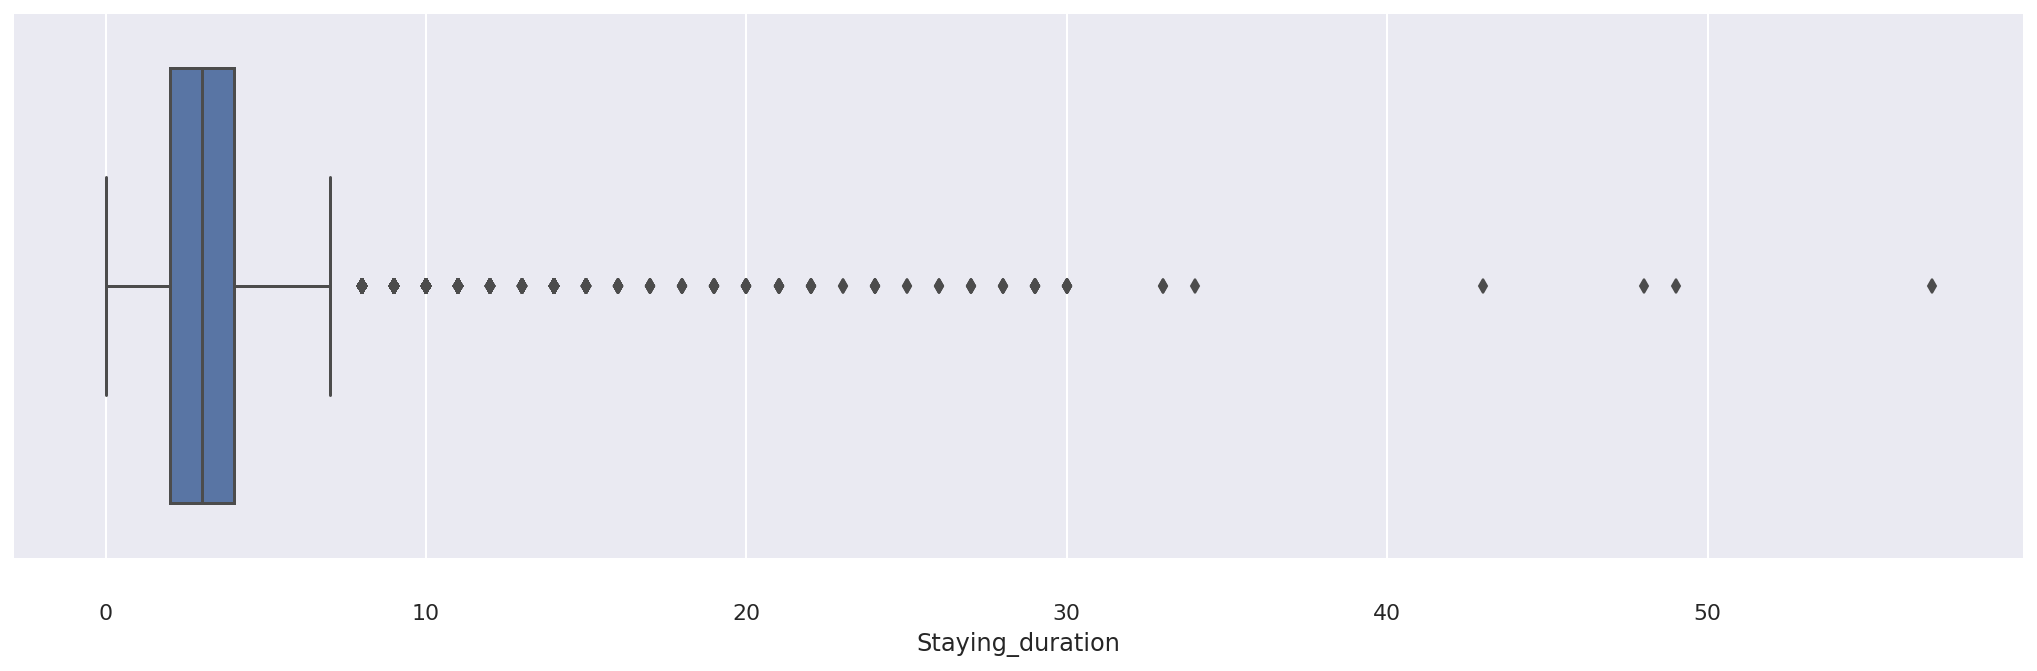

In [43]:
#Boxplot of the new created staying duration variable
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='Staying_duration',
            data=h2,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

# Treat NA values

In [44]:
h2['Children'].unique()

array([ 0.,  1.,  2., nan,  3.])

In [45]:
h2['Children'].fillna(0, inplace=True)

In [46]:
h2['Children'].unique()

array([0., 1., 2., 3.])

## Define Metric and Non-metric features

In [47]:
#define again metric and non metric features after feature engineering 
metric= ['LeadTime', 'Adults', 'Children','PreviousCancellations', 'PreviousBookingsNotCanceled', 'Babies', 'BookingChanges', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Staying_duration']

In [48]:
len(metric)

11

In [49]:
non_metric=['Meal', 'Agent', 'Company','ArrivalDateMonth', 'ReservedRoomType', 'DepositType', 'CustomerType', 'IsRepeatedGuest', 'WeekendNight']

In [50]:
len(non_metric)

9

In [51]:
target= ['IsCanceled']

## Outlier Removal

In [52]:
#Given the results of the box plots, we defined limits to filter out the outliers for the following numerical variables


filters1 = (
    (h2['LeadTime']<=600)
    &
    (h2['Adults']<=3)
    &
    (h2['Children']<=2)
    &
    (h2['Babies']<=2)
    &
    (h2['TotalOfSpecialRequests']<=4)
    &
    (h2['RequiredCarParkingSpaces']<=2)
     &
    (h2['ADR']<5400)
      &
    (h2['BookingChanges']<20)
     &
    (h2['Staying_duration']<=30)
)

h2_outliers_removed = h2[filters1]
print('Percentage of data kept after removing outliers:', np.round(h2_outliers_removed.shape[0] / h2.shape[0], 4))

Percentage of data kept after removing outliers: 0.9965


In [53]:
h2=h2_outliers_removed

## Encoding non_metric/categorical features

## One-Hot Encoding

In [54]:
### Train ###
h2_ohc = h2.copy()


In [55]:
#Using the One-Hot encoding algorithm we converted categorical variables to binaries. 

ohc = OneHotEncoder(sparse=False, drop='first')
ohc_feat = ohc.fit_transform(h2_ohc[non_metric])
ohc_feat_names = ohc.get_feature_names(non_metric)
ohc_h2 = pd.DataFrame(ohc_feat, index = h2_ohc.index, columns = ohc_feat_names)  

In [56]:
ohc_h2

,Meal_FB,Meal_HB,Meal_SC,Agent_1,Company_1,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,IsRepeatedGuest_1,WeekendNight_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79326,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79327,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79328,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [57]:
#we create a new dataframe to include the encoded variables
h2_ohc=pd.concat([ohc_h2,h2[metric]], axis = 1)

In [58]:
h2_ohc

,Meal_FB,Meal_HB,Meal_SC,Agent_1,Company_1,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_P,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,IsRepeatedGuest_1,WeekendNight_1,LeadTime,Adults,Children,PreviousCancellations,PreviousBookingsNotCanceled,Babies,BookingChanges,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Staying_duration
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,1,0.0,0,0,0,0,0.00,0,0,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,88,2,0.0,0,0,0,0,76.50,0,1,4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65,1,0.0,0,0,0,0,68.00,0,1,4
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,92,2,0.0,0,0,0,0,76.50,0,2,6
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100,2,0.0,0,0,0,0,76.50,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23,2,0.0,0,0,0,0,96.14,0,0,7
79326,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,102,3,0.0,0,0,0,0,225.43,0,2,7
79327,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,34,2,0.0,0,0,0,0,157.71,0,4,7
79328,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,109,2,0.0,0,0,0,0,104.40,0,0,7


# Train Validation Test split

In [59]:
h2_target = h2['IsCanceled']
h2_data = h2_ohc

#First split into TainValidation and Test (80-20)
X_train_val, X_test, y_train_val, y_test = train_test_split(h2_data, 
                                                  h2_target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=h2_target
                                                   )
#Split TainValidation into train and validation (60-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                 test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y_train_val
)

print('train:{}% | validation:{}% | test:{}%'.format((round(len(y_train)/len(h2_target),2)*100),
                                                    (round(len(y_val)/len(h2_target),2)*100),
                                                    (round(len(y_test)/len(h2_target),2)*100)
                                                    ))

train:60.0% | validation:20.0% | test:20.0%


# Data Normalization

In [60]:
#we will use the robust scaller normalization tool
robs = RobustScaler()
normalized_x_train = pd.DataFrame(robs.fit_transform(X_train), columns = X_train.columns)
normalized_x_validation = pd.DataFrame(robs.transform(X_val), columns = X_val.columns)
normalized_x_test = pd.DataFrame(robs.transform(X_test), columns = X_test.columns)

In [61]:
normalized_x_train = X_train
normalized_x_validation = X_val
normalized_x_test = X_test

# Model Selection #

In [62]:
def metrics_I(y_train, pred_train): #y_val, pred_val, y_test, pred_test
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

In [63]:
def metrics_II(y_train, pred_train, y_val, pred_val, y_test, pred_test):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    
    
    print('___________________________________________________________________________________________________________')
    print('                                               TEST                                                        ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))

## Neural Network 

### Neural Network

In [64]:
modelNN1 = MLPClassifier(random_state=42)
modelNN1.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [65]:
prob_modelNN1 = modelNN1.predict_proba(X_test)

In [66]:
labels_train_nn1 = modelNN1.predict(X_train)


In [67]:
metrics_I(y_train, labels_train_nn1)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     27675
           1       0.88      0.67      0.76     19758

    accuracy                           0.82     47433
   macro avg       0.84      0.80      0.81     47433
weighted avg       0.83      0.82      0.82     47433

[[25935  1740]
 [ 6618 13140]]


In [68]:
score_modelNN1_val = modelNN1.score(X_val, y_val)

In [69]:
#cv_modelNN1_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelNN1_val = cross_val_score(modelNN1, X_val, y_val, scoring='accuracy', 
#                                   cv=cv_modelNN1_val , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelNN1_val), std(n_scores_modelNN1_val)))

In [70]:
score_modelNN1_test = modelNN1.score(X_test, y_test)

In [71]:
#cv_modelNN1_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelNN1_test = cross_val_score(modelNN1, X_test, y_test, scoring='accuracy', 
#                                   cv=cv_modelNN1_test , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelNN1_test), std(n_scores_modelNN1_test)))

### Neural Networks | Tuning Parameters

In [72]:
modelNN2 = MLPClassifier(hidden_layer_sizes= (100,100,100), learning_rate='adaptive', learning_rate_init=0.001, random_state=42, max_iter = 500)
modelNN2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
prob_modelNN2 = modelNN2.predict_proba(X_test)

In [74]:
labels_train_nn2 = modelNN2.predict(X_train)
labels_test_nn2 = modelNN2.predict(X_test)

In [75]:
metrics_I(y_train, labels_train_nn2)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     27675
           1       0.86      0.84      0.85     19758

    accuracy                           0.87     47433
   macro avg       0.87      0.87      0.87     47433
weighted avg       0.87      0.87      0.87     47433

[[24923  2752]
 [ 3231 16527]]


In [76]:
score_modelNN2_val=modelNN2.score(X_val, y_val)

In [77]:
#cv_modelNN2_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelNN2_val = cross_val_score(modelNN2, X_val, y_val, scoring='accuracy', 
#                                   cv=cv_modelNN2_val , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelNN2_val), std(n_scores_modelNN2_val)))

In [78]:
score_modelNN2_test=modelNN2.score(X_test, y_test)

In [79]:
#cv_modelNN2_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelNN2_test = cross_val_score(modelNN2, X_test, y_test, scoring='accuracy', 
#                                   cv=cv_modelNN2_test , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelNN2_test), std(n_scores_modelNN2_test)))

### Neural Networks |  Model Comparison

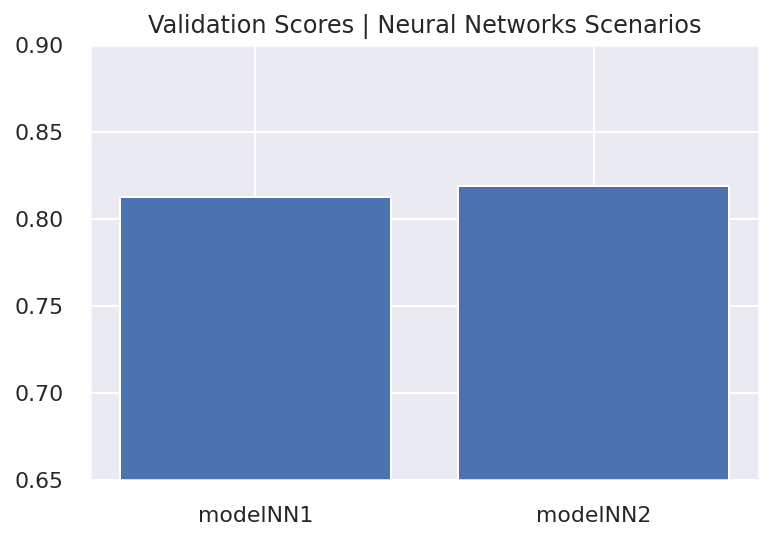

In [80]:
accuracies_NN_val = [score_modelNN1_val, score_modelNN2_val]
models_NN_val = ['modelNN1', 'modelNN2']
data_tuples = list(zip(models_NN_val ,accuracies_NN_val))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.title('Validation Scores | Neural Networks Scenarios')
plt.ylim(0.65,0.90)
plt.show()

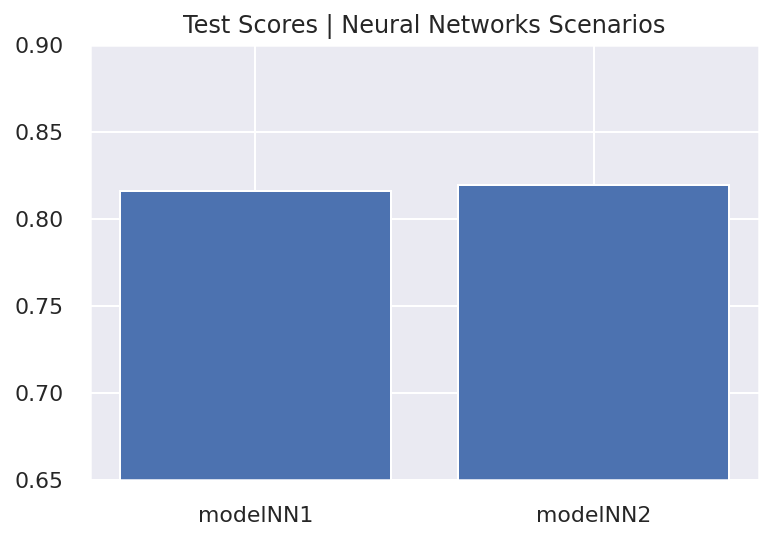

In [81]:
accuracies_NN_test = [score_modelNN1_test, score_modelNN2_test]
models_NN_test = ['modelNN1','modelNN2']
data_tuples = list(zip(models_NN_test ,accuracies_NN_test))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.title('Test Scores | Neural Networks Scenarios')
plt.ylim(0.65,0.90)
plt.show()

## Random Forest

### Random Forest

In [82]:
#Applying the RandomForest Classifier 
modelRF = RandomForestClassifier(random_state=42, class_weight='balanced')
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [83]:
prob_modelRF = modelRF.predict_proba(X_test)

In [84]:
# Predicting the labels for X_test, X_train, X_val
labels_train_rf = modelRF.predict(X_train)


In [85]:
metrics_I(y_train, labels_train_rf)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27675
           1       0.99      0.99      0.99     19758

    accuracy                           0.99     47433
   macro avg       0.99      0.99      0.99     47433
weighted avg       0.99      0.99      0.99     47433

[[27473   202]
 [  252 19506]]


In [86]:
score_modelRF_val = modelRF.score(X_val, y_val)

In [87]:
#cv_modelRF_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelRF_val = cross_val_score(modelRF, X_val, y_val, scoring='accuracy', 
#                                   cv=cv_modelRF_val , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelRF_val), std(n_scores_modelRF_val)))

In [88]:
score_modelRF_test = modelRF.score(X_test, y_test)

In [89]:
#cv_modelRF_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelRF_test = cross_val_score(modelRF, X_test, y_test, scoring='accuracy', 
#                                   cv=cv_modelRF_test , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelRF_test), std(n_scores_modelRF_test)))

### Random Forest | Tuning Parameters

In [90]:
# Tuning the parameters to try to get better performance from the model.
# We will try to have the model with the highest precision through cross validation.
#ATTENTION: it takes 10 minutes to run

parameters = {'max_features':['sqrt', 'log2', 10,20],
              'max_depth':[10,20,50],
              'n_estimators':[100,200]}

clf_grid = GridSearchCV(modelRF, parameters, n_jobs=-1, cv=5, scoring='accuracy')
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [91]:
# Checking the hyperparameters tuned to have the highest precision
clf_grid.best_params_

{'max_depth': 50, 'max_features': 20, 'n_estimators': 100}

In [92]:
#Applying the RandomForest Classifier to the data set oversampled through SMOTE technique
modelRF2 = RandomForestClassifier(n_estimators=200, max_depth=50, max_features=20)
modelRF2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
prob_modelRF2 = modelRF2.predict_proba(X_test)

In [94]:
# Predicting the labels for X_test, X_train, X_val
labels_train_rf2 = modelRF2.predict(X_train)
labels_test_rf2 = modelRF2.predict(X_test)

In [95]:
metrics_I(y_train, labels_train_rf2)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27675
           1       0.99      0.98      0.99     19758

    accuracy                           0.99     47433
   macro avg       0.99      0.99      0.99     47433
weighted avg       0.99      0.99      0.99     47433

[[27537   138]
 [  307 19451]]


In [96]:
score_modelRF2_val=modelRF2.score(X_val, y_val)

In [97]:
#cv_modelRF2_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelRF2_val = cross_val_score(modelRF2, X_val, y_val, scoring='accuracy', 
#                                   cv=cv_modelRF2_val , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelRF2_val), std(n_scores_modelRF2_val)))

In [98]:
score_modelRF2_test=modelRF2.score(X_test, y_test)

In [99]:
#cv_modelRF2_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelRF2_test = cross_val_score(modelRF2, X_test, y_test, scoring='accuracy', 
#                                   cv=cv_modelRF2_test , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelRF2_test), std(n_scores_modelRF2_test)))

### Random Forest | Model Comparison

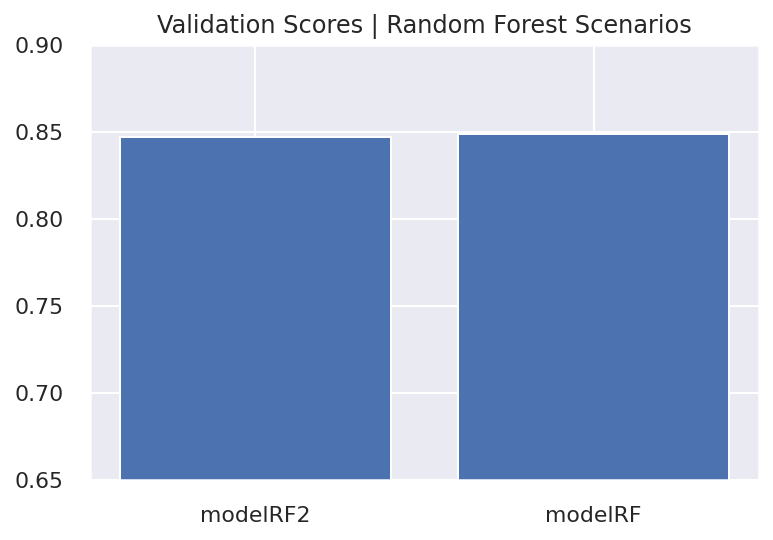

In [100]:
accuracies_RF_val = [score_modelRF_val, score_modelRF2_val]
models_RF_val = ['modelRF', 'modelRF2']
data_tuples = list(zip(models_RF_val ,accuracies_RF_val))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.title('Validation Scores | Random Forest Scenarios')
plt.ylim(0.65,0.90)
plt.show()

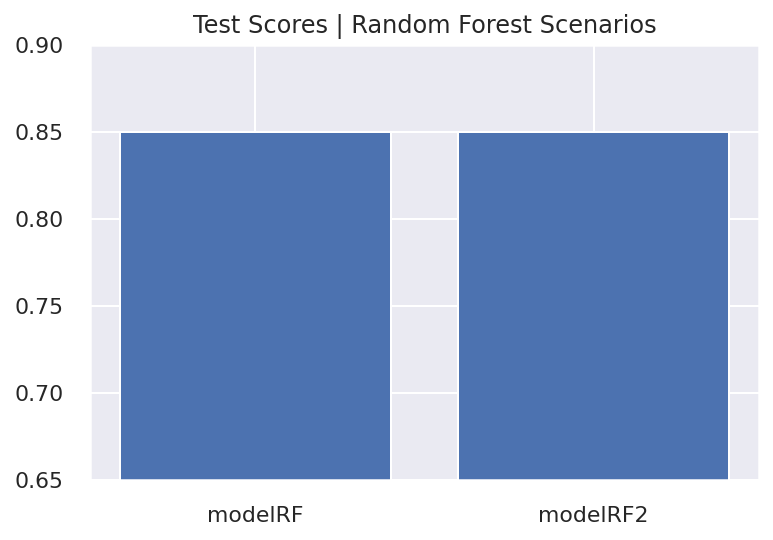

In [101]:
accuracies_RF_test = [score_modelRF_test, score_modelRF2_test]
models_RF_test = ['modelRF', 'modelRF2']
data_tuples = list(zip(models_RF_test ,accuracies_RF_test))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.title('Test Scores | Random Forest Scenarios')
plt.ylim(0.65,0.90)
plt.show()

In [102]:
print(score_modelRF2_test)

0.8500505944852011


## Grandient Boosting

### Gradient Boosting

In [103]:
modelGB1 = GradientBoostingClassifier()
modelGB1.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [104]:
prob_modelGB1 = modelGB1.predict_proba(X_test)

In [105]:
labels_train_gb1 = modelGB1.predict(X_train)
labels_test_gb1 = modelGB1.predict(X_test)

In [106]:
metrics_I(y_train, labels_train_gb1)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27675
           1       0.87      0.64      0.74     19758

    accuracy                           0.81     47433
   macro avg       0.83      0.79      0.80     47433
weighted avg       0.82      0.81      0.80     47433

[[25710  1965]
 [ 7018 12740]]


In [107]:
score_modelGB1_val = modelGB1.score(X_val, y_val)

In [108]:
#cv_modelGB1_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelGB1_val = cross_val_score(modelGB1, X_val, y_val, scoring='accuracy', 
#                                   cv=cv_modelGB1_val , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelGB1_val), std(n_scores_modelGB1_val)))

In [109]:
score_modelGB1_test = modelGB1.score(X_test, y_test)

In [110]:
score_modelGB1_test 

0.8109031115608398

In [111]:
#cv_modelGB1_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelGB1_test = cross_val_score(modelGB1, X_test, y_test, scoring='accuracy', 
#                                   cv=cv_modelGB1_test , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelGB1_test), std(n_scores_modelGB1_test)))

### Gradient Boosting Decision Tree | Tuning Parameters

In [112]:
parameters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_GBDT = DecisionTreeClassifier()
clfGBDT = GridSearchCV(clf_GBDT,parameters)
clfGBDT.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                    

In [113]:
# Checking the hyperparameters tuned to have the highest precision
clfGBDT.best_params_

{'max_depth': 19, 'min_samples_split': 50}

In [114]:
modelGBDT1 = GradientBoostingClassifier(max_depth = 19, min_samples_split = 50)
modelGBDT1.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=19,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [115]:
labels_train_gbdt1 = modelGBDT1.predict(X_train)
labels_test_gbdt1 = modelGBDT1.predict(X_test)

In [116]:
prob_modelGBDT1 = modelGBDT1.predict_proba(X_test)

In [117]:
metrics_I(y_train, labels_train_gbdt1)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27675
           1       0.98      0.94      0.96     19758

    accuracy                           0.97     47433
   macro avg       0.97      0.96      0.97     47433
weighted avg       0.97      0.97      0.97     47433

[[27210   465]
 [ 1109 18649]]


In [118]:
score_modelGBDT1_val=modelGBDT1.score(X_val, y_val)

In [119]:
#cv_modelGBDT1_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelGBDT1_val = cross_val_score(modelGBDT1, X_val, y_val, scoring='accuracy', 
#                                   cv=cv_modelGBDT1_val , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelGBDT1_val), std(n_scores_modelGBDT1_val)))

In [120]:
score_modelGBDT1_test=modelGBDT1.score(X_test, y_test)

In [121]:
#cv_modelGBDT1_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#n_scores_modelGBDT1_test = cross_val_score(modelGBDT1, X_test, y_test, scoring='accuracy', 
#                                   cv=cv_modelGBDT1_test , n_jobs=-1, error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(n_scores_modelGBDT1_test), std(n_scores_modelGBDT1_test)))

### Gradient Boosting |  Model Comparison

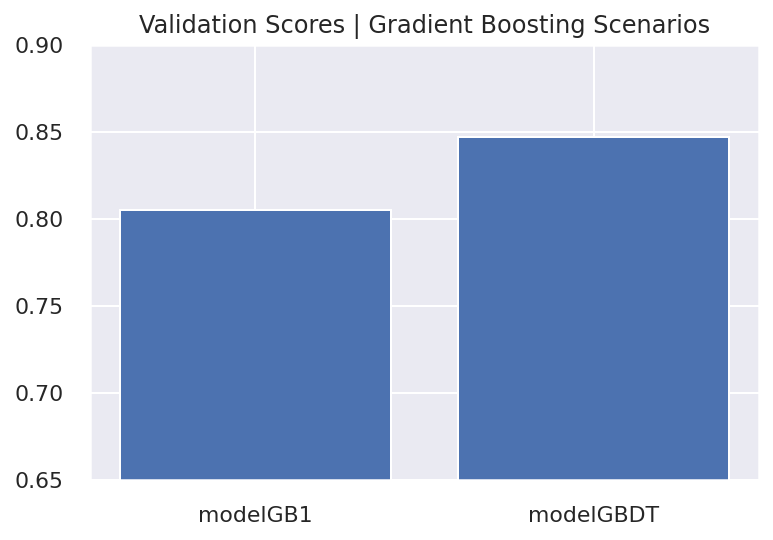

In [122]:
accuracies_GB_val = [score_modelGB1_val, score_modelGBDT1_val]
models_GB_val = ['modelGB1', 'modelGBDT']
data_tuples = list(zip(models_GB_val ,accuracies_GB_val))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.title('Validation Scores | Gradient Boosting Scenarios')
plt.ylim(0.65,0.90)
plt.show()

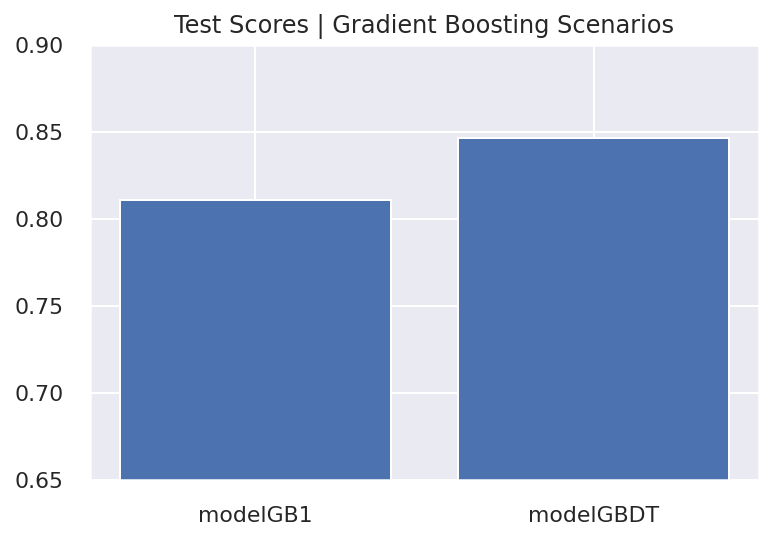

In [123]:
accuracies_GB_test = [score_modelGB1_test, score_modelGBDT1_test]
models_GB_test = ['modelGB1', 'modelGBDT']
data_tuples = list(zip(models_GB_test,accuracies_GB_test))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.title('Test Scores | Gradient Boosting Scenarios')
plt.ylim(0.65,0.90)
plt.show()

# Best Model Comparison

## ROC Curve 

In [124]:
fpr_NN2, tpr_NN2, thresholds_NN2 = roc_curve(y_test, prob_modelNN2[:, 1])
fpr_RF2, tpr_RF2, thresholds_RF2 = roc_curve(y_test, prob_modelRF2[:, 1])
fpr_GBDT1, tpr_GBDT1, thresholds_GBDT1 = roc_curve(y_test, prob_modelGBDT1[:, 1])

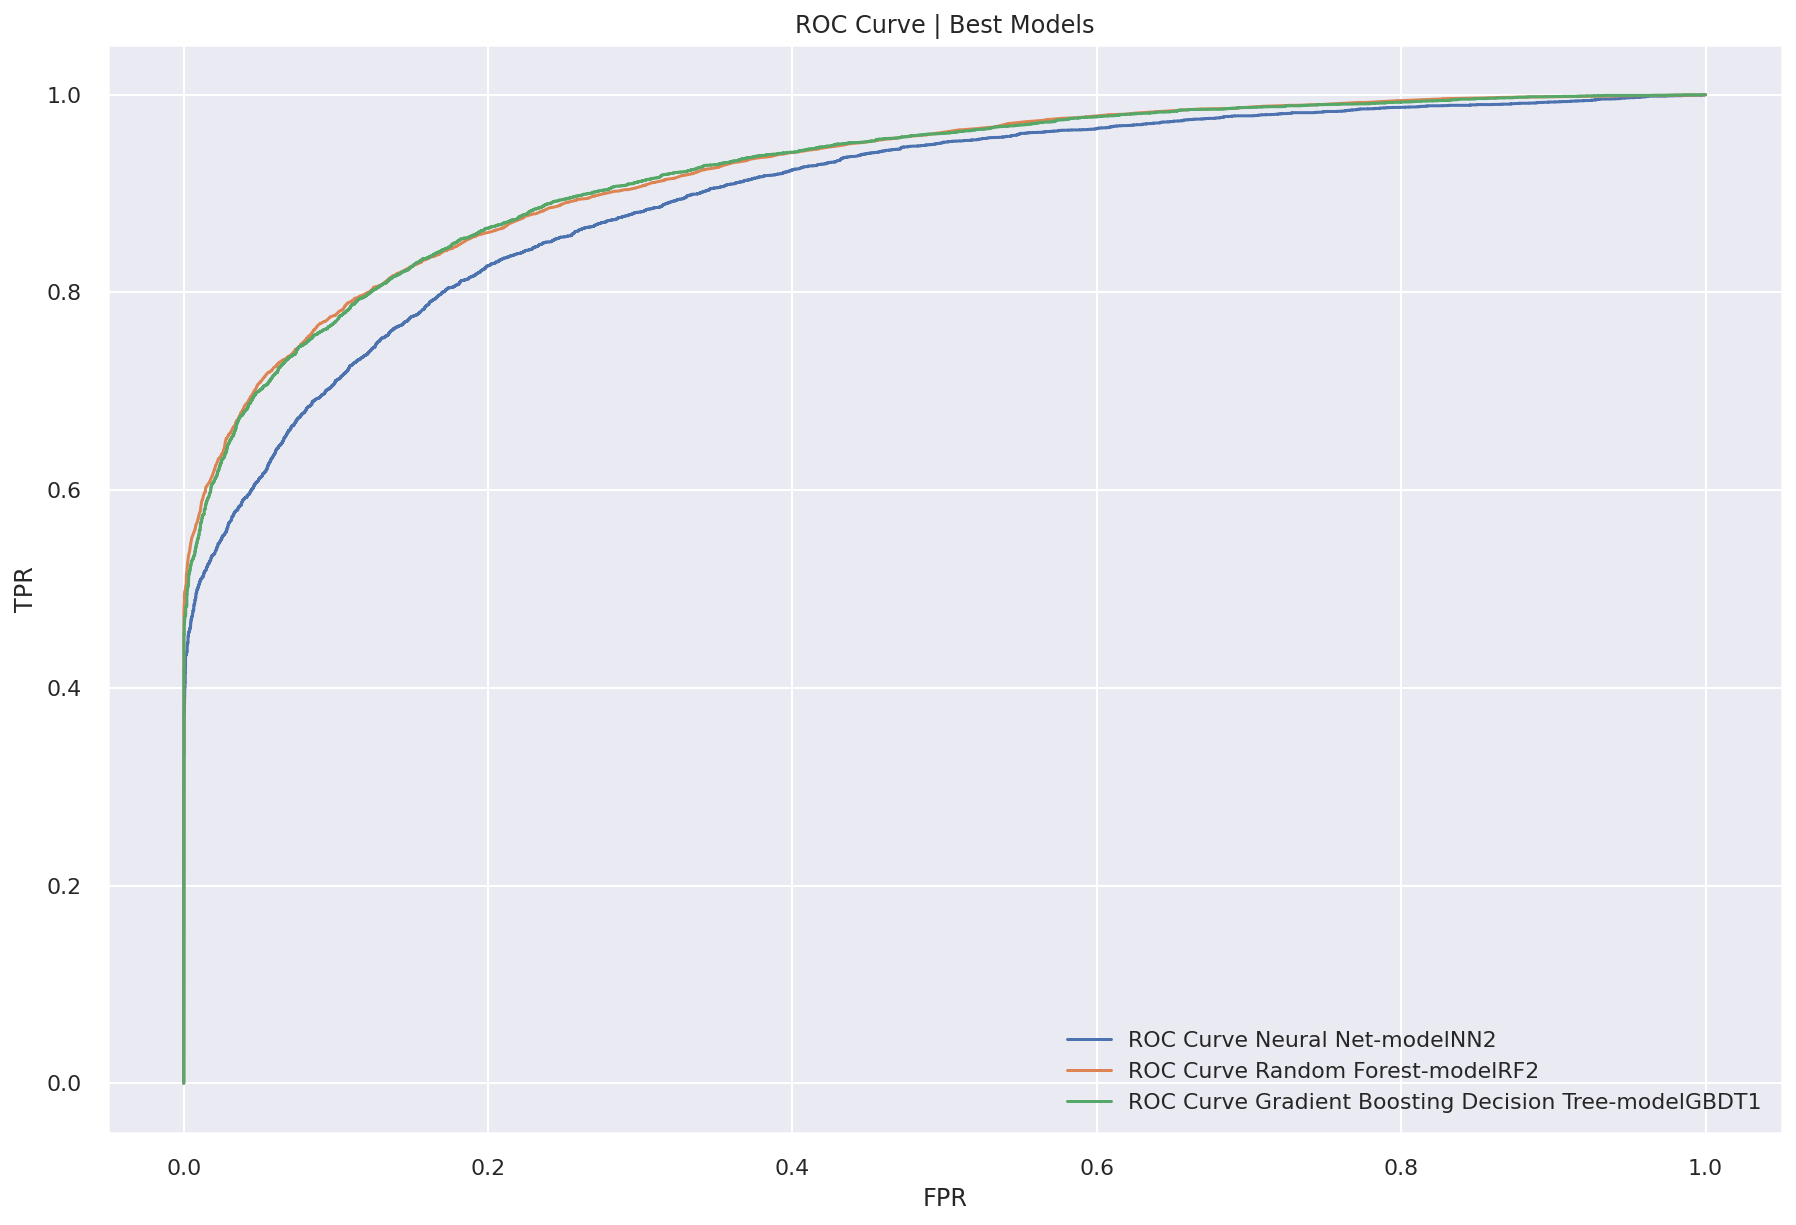

In [125]:
plt.figure(figsize=(15, 10))
plt.plot(fpr_NN2, tpr_NN2,label="ROC Curve Neural Net-modelNN2")
plt.plot(fpr_RF2, tpr_RF2,label="ROC Curve Random Forest-modelRF2")
plt.plot(fpr_GBDT1, tpr_GBDT1,label="ROC Curve Gradient Boosting Decision Tree-modelGBDT1")
plt.title('ROC Curve | Best Models')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

#plt.savefig('ROC.pdf')

## Accuracy

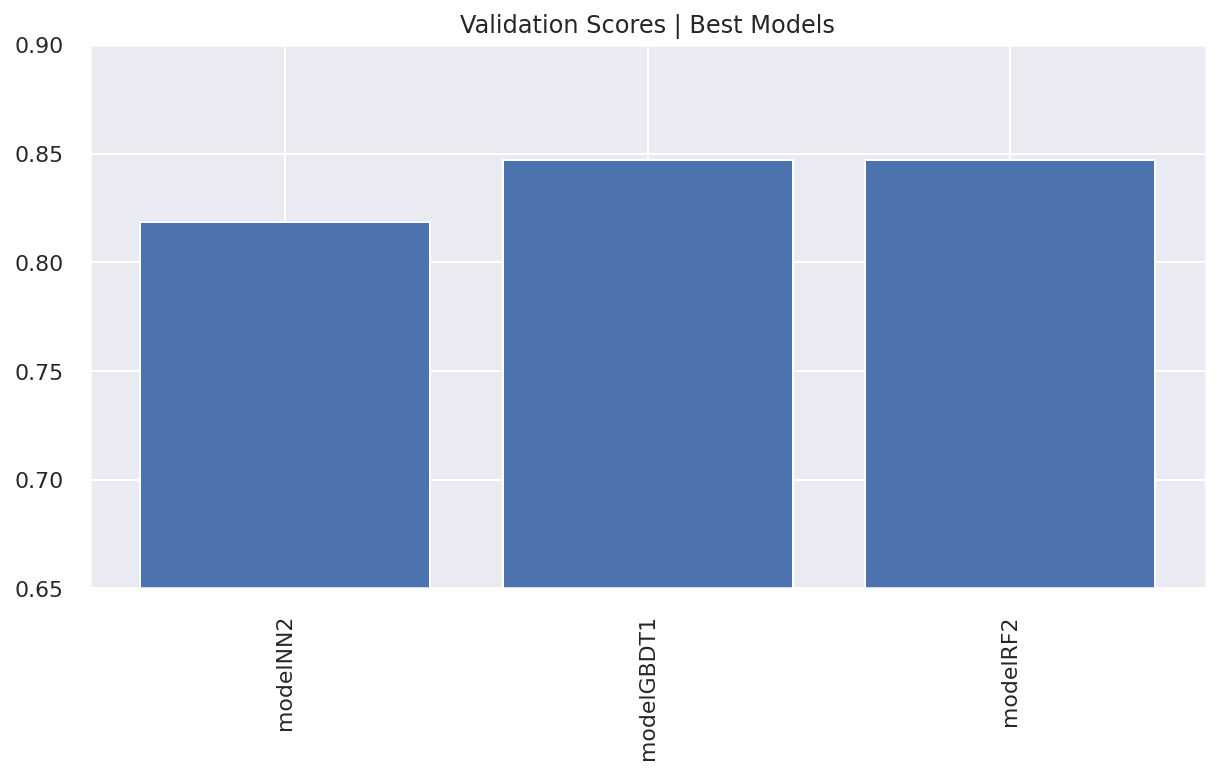

In [126]:
accuracies_val = [score_modelNN2_val, score_modelRF2_val, score_modelGBDT1_val]
models_val = ['modelNN2', 'modelRF2', 'modelGBDT1']
data_tuples = list(zip(models_val ,accuracies_val))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(10, 5))
plt.bar(data[0], data[1])
plt.title('Validation Scores | Best Models')
plt.ylim(0.65,0.90)
plt.xticks(fontsize=11, rotation=90)
plt.show()

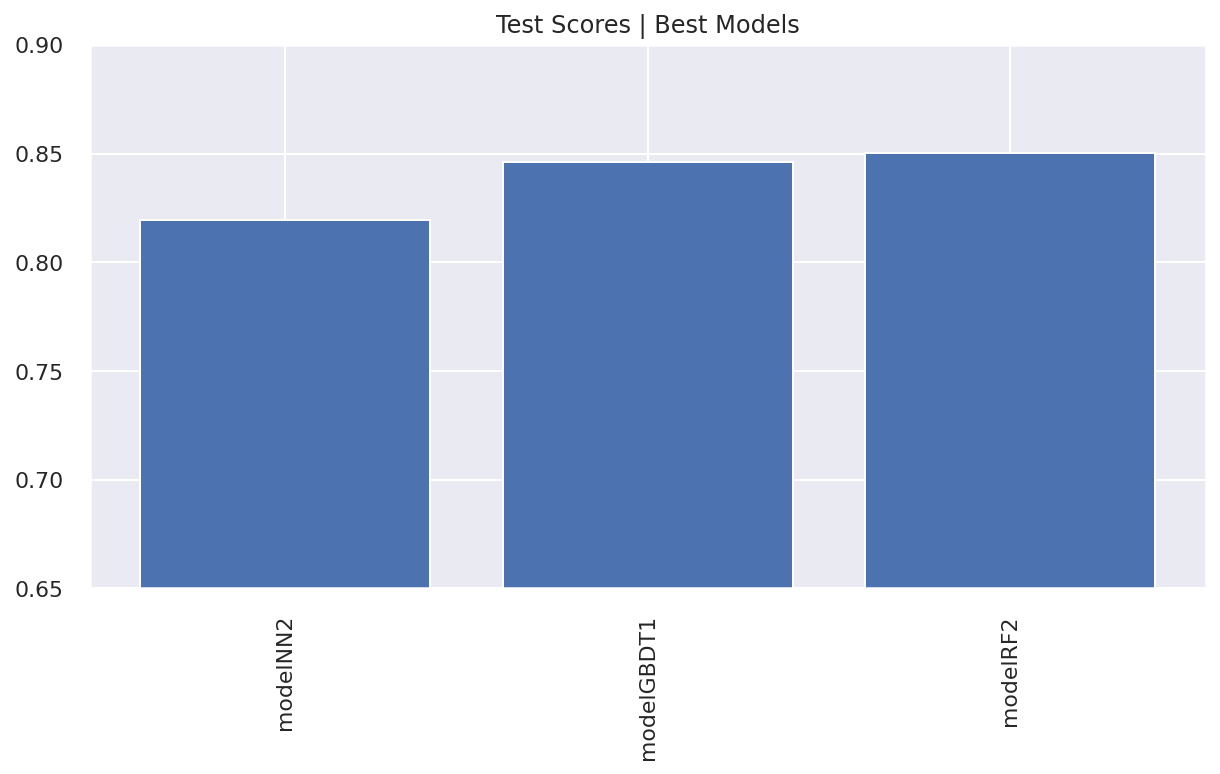

In [127]:
accuracies_test = [score_modelNN2_test, score_modelRF2_test, score_modelGBDT1_test]
models_test = ['modelNN2', 'modelRF2', 'modelGBDT1']
data_tuples = list(zip(models_test ,accuracies_test))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(10, 5))
plt.bar(data[0], data[1])
plt.title('Test Scores | Best Models')
plt.ylim(0.65,0.90)
plt.xticks(fontsize=11, rotation=90)
plt.show()

## Stacking - Gradient Boosting Decision Tree, Neural Networks, Random Forest

In [128]:
estimators = [('nn', modelRF2),('gbdt', modelGBDT1)]
sc = StackingClassifier(estimators=estimators, final_estimator=modelNN2)
sc.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('nn',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=50,
                                                       max_features=20,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                           

In [129]:
prob_sc = sc.predict_proba(X_test)

In [130]:
labels_train_sc = sc.predict(X_train)
labels_test_sc = sc.predict(X_test)

In [131]:
metrics_I(y_train, labels_train_sc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27675
           1       1.00      0.97      0.98     19758

    accuracy                           0.98     47433
   macro avg       0.99      0.98      0.98     47433
weighted avg       0.98      0.98      0.98     47433

[[27583    92]
 [  684 19074]]


In [132]:
score_sc_val = sc.score(X_val, y_val)

In [159]:
cv_sc_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores_sc_val = cross_val_score(sc, X_val, y_val, scoring='accuracy', 
                                   cv=cv_sc_val , n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores_sc_val), std(n_scores_sc_val)))

Accuracy: 0.826 (0.011)


In [134]:
score_sc_test = sc.score(X_test, y_test)

In [160]:
cv_sc_test = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores_sc_test = cross_val_score(sc, X_test, y_test, scoring='accuracy', 
                                   cv=cv_sc_test , n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores_sc_test), std(n_scores_sc_test)))

Accuracy: 0.832 (0.006)


In [136]:
print("Recall: %.4f" % metrics.recall_score(y_test, labels_test_sc))
print("Precision: %.4f" % metrics.precision_score(y_test, labels_test_sc))
print("Accuracy: %.4f" % metrics.accuracy_score(y_test, labels_test_sc))
print("ROC_AUC: %.4f" % metrics.roc_auc_score(y_test, labels_test_sc))
print("F1 score: %.4f" % metrics.f1_score(y_test, labels_test_sc))

Recall: 0.7442
Precision: 0.8788
Accuracy: 0.8507
ROC_AUC: 0.8355
F1 score: 0.8059


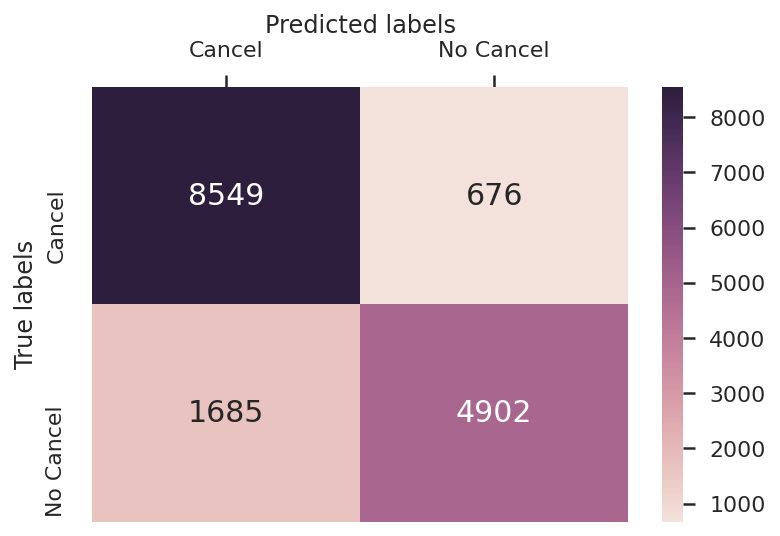

In [137]:
#Confusion matrix
confusion_matrix = confusion_matrix(y_test, labels_test_sc)

# plot in a heatmap
ax= plt.subplot()
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
sns.heatmap(confusion_matrix, annot=True,fmt="d", ax = ax, cmap=cmap, annot_kws={"size": 15}); #annot=True to annotate cells
# labels, title and ticks
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top') # x label on top
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
#ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Cancel', 'No Cancel']); ax.yaxis.set_ticklabels(['Cancel', 'No Cancel']);

## Lift

In [138]:
best_model=sc

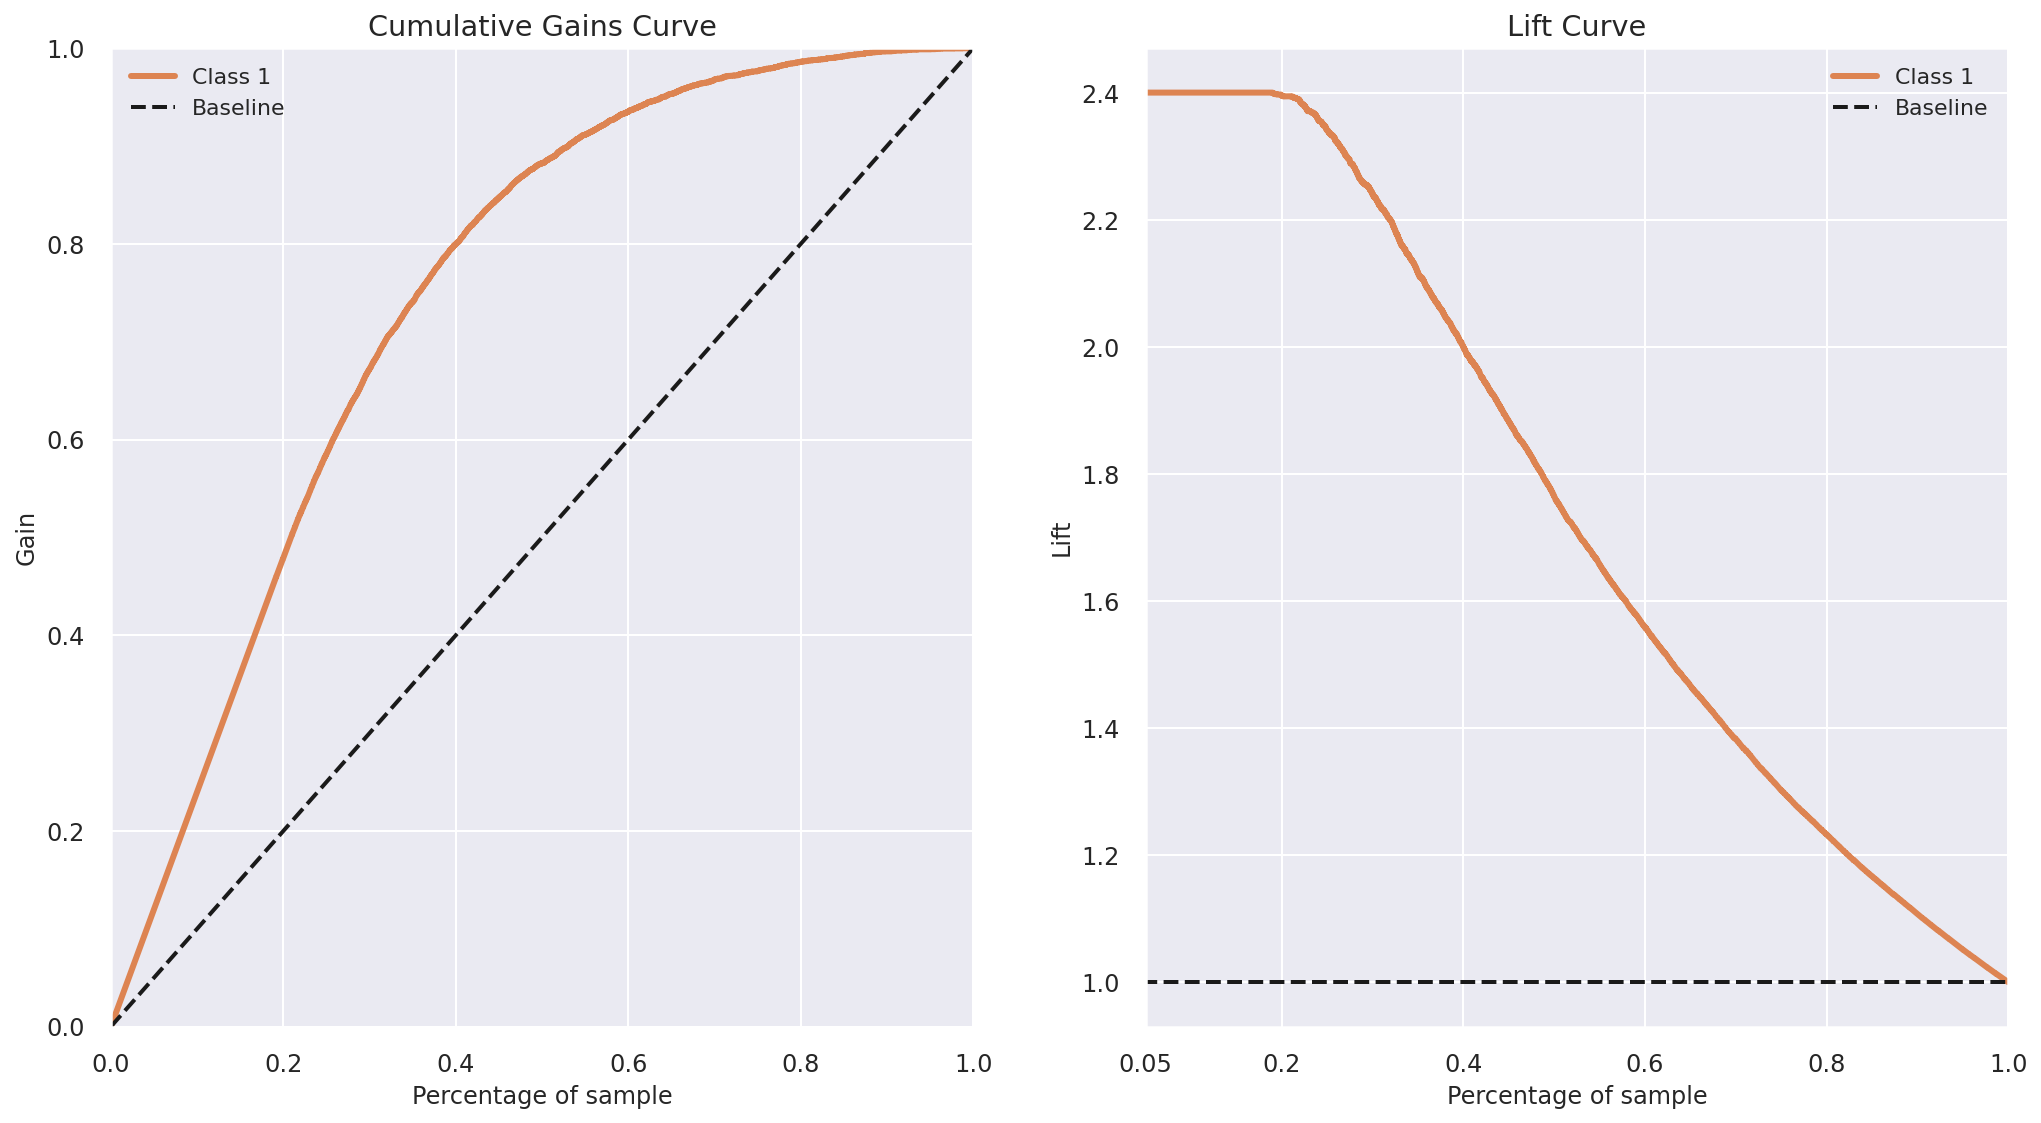

In [139]:
# Plot lift curves
predicted_probas = best_model.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
skplt.metrics.plot_lift_curve(y_test, predicted_probas, ax=ax2)       
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

# Segmentation

In [140]:
metric

['LeadTime',
 'Adults',
 'Children',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'Babies',
 'BookingChanges',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'Staying_duration']

In [141]:
## Kmeans all variables

h2_seg=h2.copy()
trans = MinMaxScaler()
minmax_metric_features = trans.fit_transform(h2_seg[metric])


# assign the metric features transformed 
h2_seg[metric]=minmax_metric_features

In [142]:
h2_seg.describe()

,IsCanceled,LeadTime,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,Company,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Staying_duration,WeekendNight
count,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000,79056.000000
mean,0.416553,0.183264,0.616740,0.044702,0.002359,0.025678,0.003810,0.001845,0.010351,0.809021,0.046587,0.206279,0.012162,0.136467,0.099171,0.523262
std,0.492991,0.183441,0.169168,0.182084,0.034813,0.158174,0.019817,0.023560,0.033092,0.393075,0.210754,0.076658,0.077151,0.194152,0.060769,0.499462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.038721,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.155294,0.000000,0.000000,0.066667,0.000000
50%,0.000000,0.124579,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.195882,0.000000,0.000000,0.100000,1.000000
75%,1.000000,0.274411,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.247059,0.000000,0.250000,0.133333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


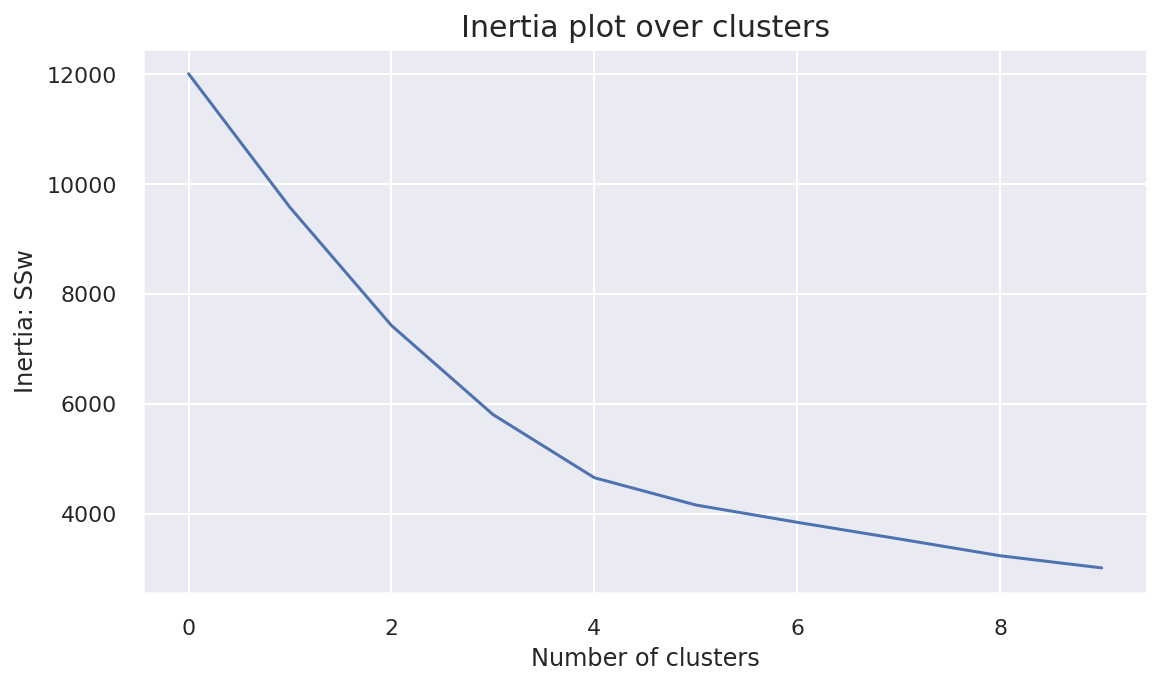

In [143]:
#inertia plot
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(h2_seg[metric])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [144]:
# Finalize and render figure

# final cluster solution
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(h2_seg[metric])
km_labels

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

In [145]:
# Characterizing the final clusters
h2_seg['labels'] =km_labels
h2['labels']=km_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [146]:
# normalized metrics per cluster
kmeans_scaled=h2_seg.groupby('labels').mean()[metric]

kmeans_scaled=kmeans_scaled.reset_index()

kmeans_scaled

,labels,LeadTime,Adults,Children,PreviousCancellations,PreviousBookingsNotCanceled,Babies,BookingChanges,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Staying_duration
0,0,0.124226,0.689248,0.000000,0.001380,0.001969,0.005497,0.011274,0.221919,0.019815,0.358928,0.107042
1,1,0.099477,0.548166,0.000000,0.002954,0.002682,0.000590,0.010506,0.193600,0.009272,0.019337,0.093428
2,2,0.145433,0.626945,0.700993,0.000265,0.000215,0.007448,0.016981,0.296913,0.028699,0.238630,0.111341
3,3,0.477196,0.663488,0.000292,0.010573,0.000258,0.000097,0.006447,0.182601,0.002011,0.041434,0.096707


In [147]:
#not normalized features per cluster
kmeans_not_scaled=h2.groupby('labels').mean()
kmeans_not_scaled

,IsCanceled,LeadTime,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,Company,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Staying_duration,WeekendNight
labels,,,,,,,,,,,,,,,,
0,0.218268,73.790162,2.067744,0.000000,0.010994,0.017599,0.028984,0.141789,0.202929,0.938078,0.015513,113.178632,0.039630,1.435710,3.211272,0.586408
1,0.429619,59.089374,1.644499,0.000000,0.001180,0.039026,0.062036,0.193077,0.189116,0.765397,0.090610,98.736058,0.018543,0.077349,2.802849,0.492751
2,0.355511,86.387090,1.880834,1.401986,0.014896,0.007150,0.005561,0.015492,0.305660,0.934856,0.005958,151.425873,0.057398,0.954518,3.340218,0.583913
3,0.702322,283.454139,1.990464,0.000584,0.000195,0.012974,0.222042,0.018552,0.116048,0.675986,0.004606,93.126746,0.004022,0.165737,2.901207,0.479632


In [148]:
#metric features per cluster
kmeans_not_scaled[metric]

,LeadTime,Adults,Children,PreviousCancellations,PreviousBookingsNotCanceled,Babies,BookingChanges,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Staying_duration
labels,,,,,,,,,,,
0,73.790162,2.067744,0.000000,0.028984,0.141789,0.010994,0.202929,113.178632,0.039630,1.435710,3.211272
1,59.089374,1.644499,0.000000,0.062036,0.193077,0.001180,0.189116,98.736058,0.018543,0.077349,2.802849
2,86.387090,1.880834,1.401986,0.005561,0.015492,0.014896,0.305660,151.425873,0.057398,0.954518,3.340218
3,283.454139,1.990464,0.000584,0.222042,0.018552,0.000195,0.116048,93.126746,0.004022,0.165737,2.901207


In [149]:
#Average values per feature per booking cancelled and not cancelled
h2.groupby('IsCanceled').mean()

,LeadTime,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,Company,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Staying_duration,WeekendNight,labels
IsCanceled,,,,,,,,,,,,,,,,
0,80.706211,1.827252,0.097192,0.006699,0.034450,0.021203,0.208932,0.262179,0.839393,0.062851,105.599415,0.041691,0.738125,2.917940,0.533333,0.879306
1,148.290547,1.882390,0.078497,0.001943,0.013392,0.162400,0.026176,0.080046,0.766481,0.023807,104.645829,0.000000,0.276578,3.055267,0.509156,1.559382


In [150]:
#kmeans_not_scaled=kmeans_not_scaled.reset_index()

#size of the clusters
df_counts = h2.groupby('labels')\
.size()\
.to_frame()

df_counts.rename(columns={0: "Size"},inplace=True)
df_counts




,Size
labels,
0,23013
1,35592
2,5035
3,15416


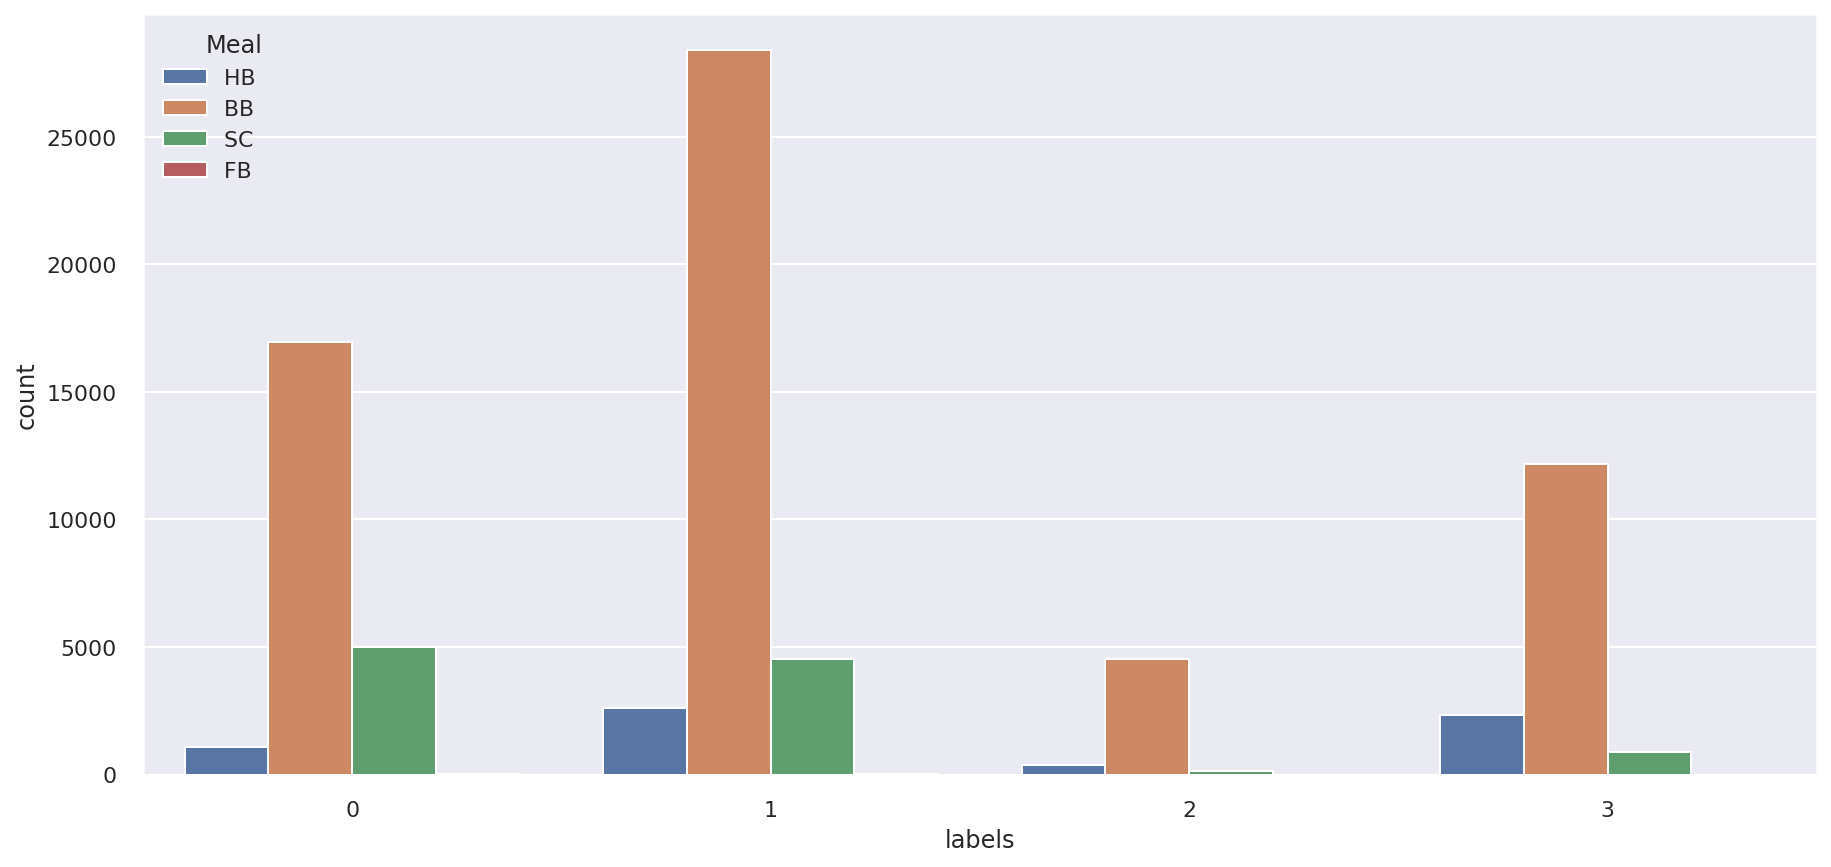

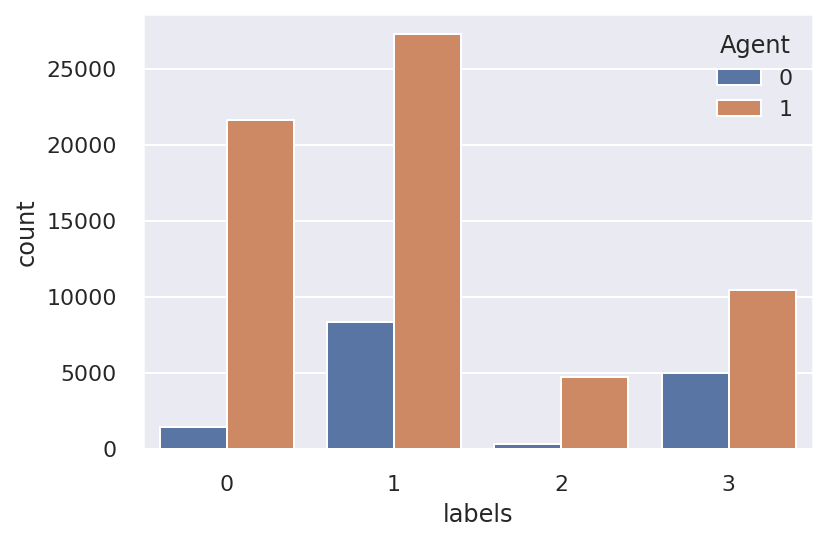

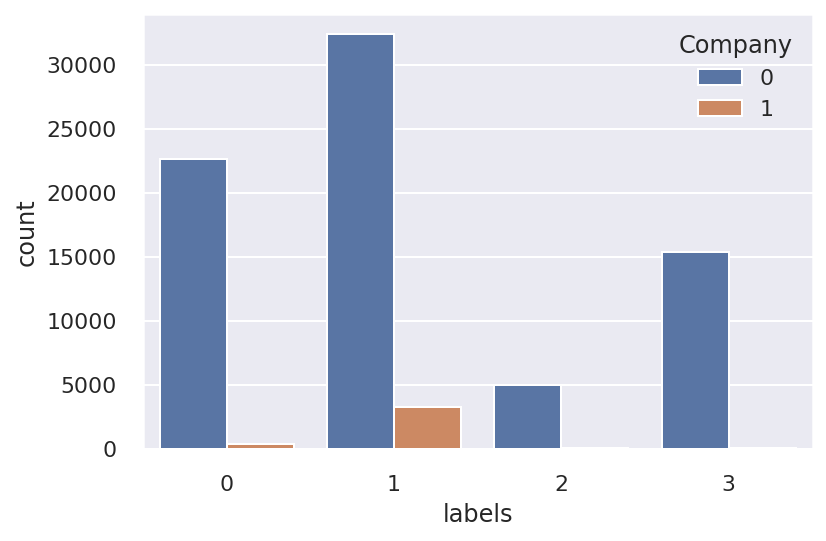

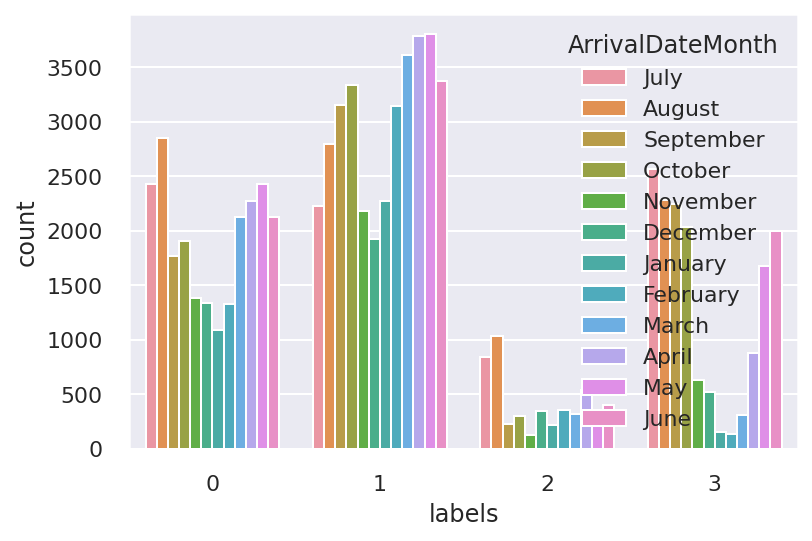

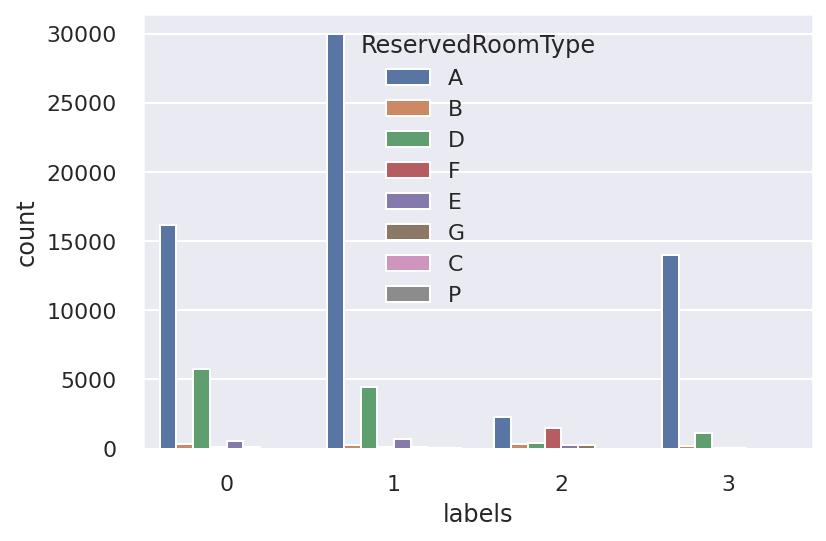

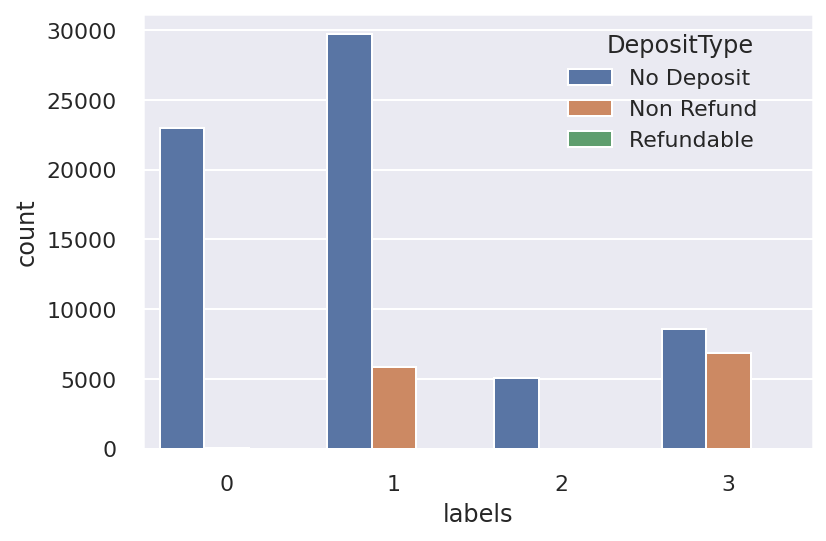

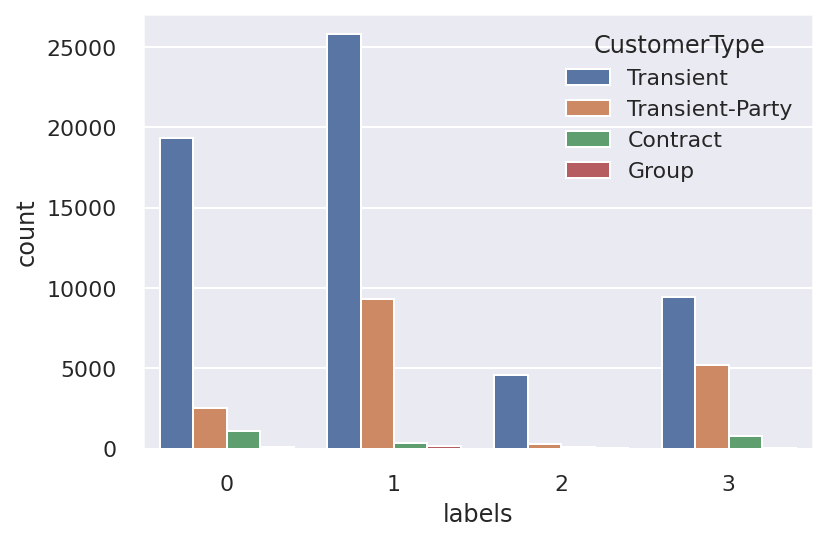

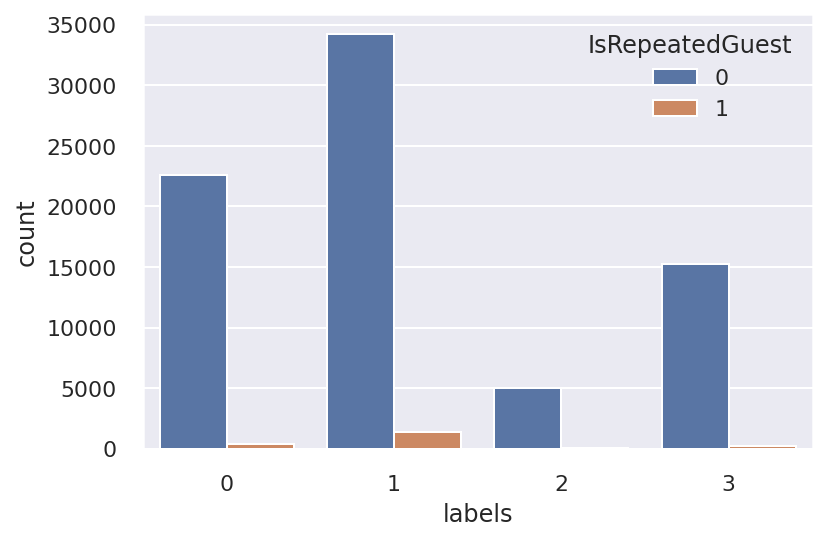

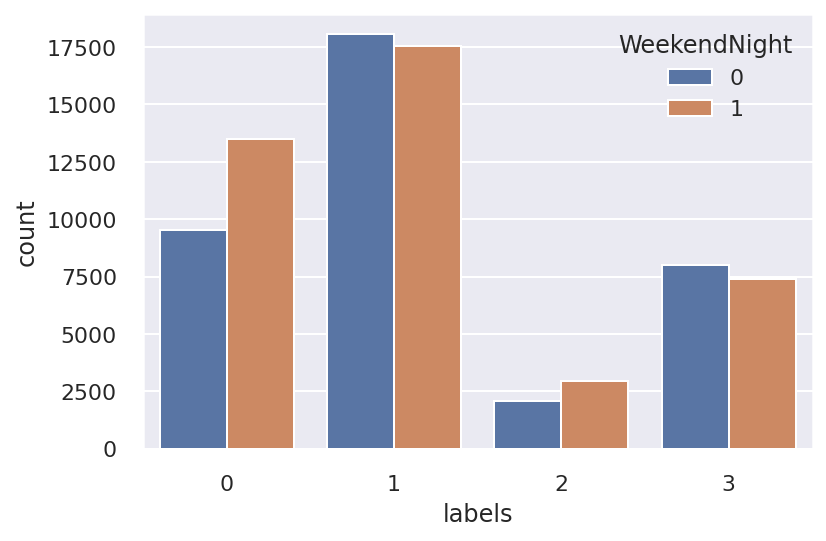

In [151]:
#graphs for the non metric features per cluster

plt.figure(figsize=(15, 7))
for var in non_metric:
    metric_feature = sns.countplot(data=h2, x= 'labels', hue=var)
    plt.show()
    figure = metric_feature.get_figure()  
    name = 'barplot_'+var+'.png'
    figure.savefig(name, dpi=400)

In [152]:
#Assessing the segmentation
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  
sst = get_ss(h2_seg[metric]) 
ssw_labels = h2_seg[metric + ["labels"]].groupby(by='labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2_kmeans = ssb / sst
r2_kmeans

0.5161815808309311

In [153]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics 
#using davies bouldin index
davies_bouldin_score(h2_seg[metric], km_labels)

davies_bouldin=davies_bouldin_score(h2_seg[metric],km_labels)

In [154]:
davies_bouldin

1.1385542518790404

In [155]:
#using calinski_harabasz
metrics.calinski_harabasz_score(h2_seg[metric], km_labels)

calinski_harabasz=metrics.calinski_harabasz_score(h2_seg[metric], km_labels)
calinski_harabasz

28113.292584659674

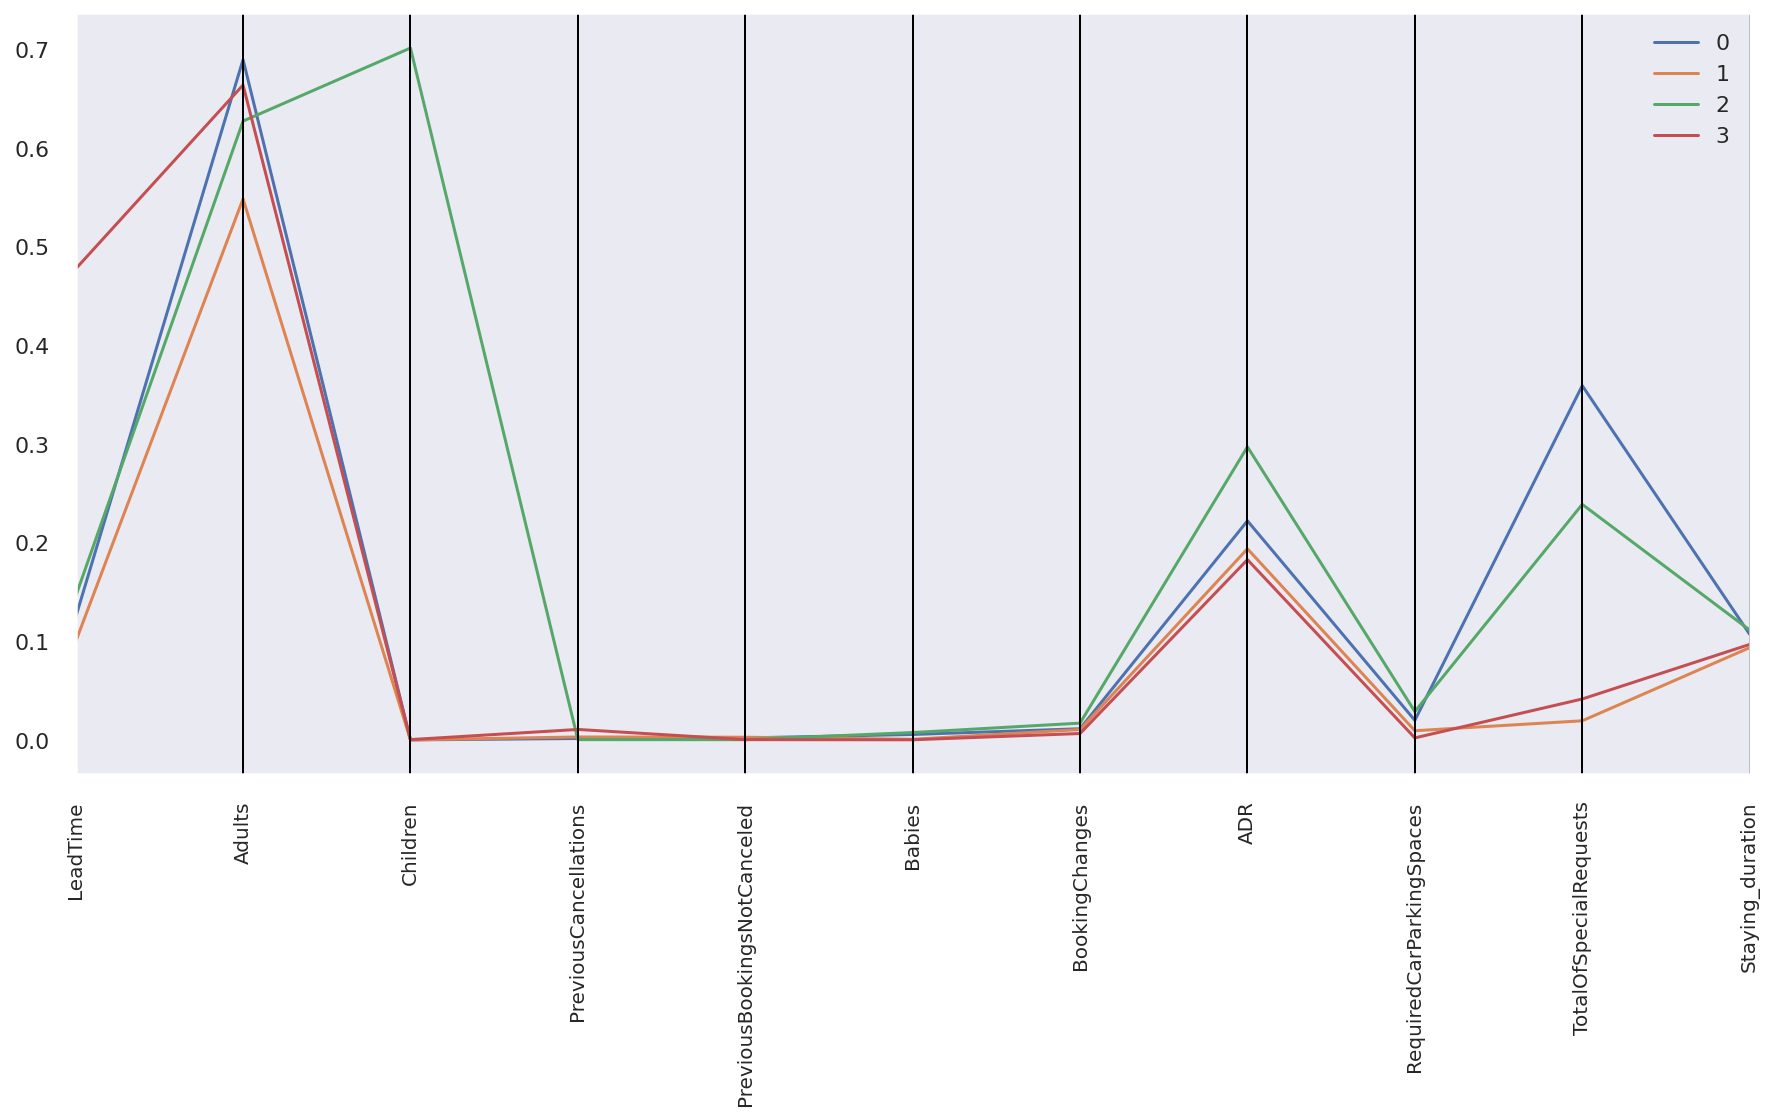

In [156]:
#profilling
plt.figure(figsize=(15, 7))
pd.plotting.parallel_coordinates(kmeans_scaled, class_column = "labels", color=sns.color_palette())
plt.xticks(fontsize=10, rotation=90)
plt.show()
